# 제 1차 해커톤: 데이터톤(Datathon)
- 팀: 3조
- 팀원: 박혜령, 이봄, 허준호, 권민호
- 선택 데이터셋
  - [전력사용량 예측 AI 경진대회](https://dacon.io/competitions/official/235736/data)
    - 시계열 | SMAPE | 한국에너지공단 | 전력
    - 대회 안내
      - 배경
        - 전력 수요 예측 시뮬레이션을 통한 효율적인 인공지능 알고리즘 발굴
        - 전력 융합 신서비스 발굴 및 비즈니스 모델 개발 활용
        - 디지털 뉴딜의 성공을 위한 인공지능(AI)의 융합, 확산을 촉진
      - 목적
        - 건물 정보와 기후 정보를 활용한 전력사용량 예측
      - 주최 / 주관
        - 주최 : 한국에너지공단
        - 주관 : 데이콘
  - 데이터: train.csv (122400, 10)
    - 60개 건물들의 2020년 6월 1일 부터 2020년 8월 24일까지의 데이터
    - 1시간 단위로 제공
    - 전력사용량(kWh) 포함
    - columns: num, date_time, 전력사용량(kWh), 기온(°C), 풍속(m/s), 습도(%), 강수량(mm), 일조(hr), 비전기냉방설비운영, 태양광보유
    - 예측 모델을 만들기 위해 사용하는 학습 데이터
    - 건물 정보와 예측할 변수인 전력사용량 변수를 가짐
- 평가 표(절대평가)

>#### 평가 항목
>|번호|항목|100|
>|:---:|---|---|
>|1|데이터 전처리, 모델학습, 예측의 전체 과정을 거쳐 캐글 submission까지 진행되었다.|15|
>|2|데이터 분석을 통한 인사이트가 도출이 잘 되었는가?|15|
>|3|도출한 인사이트를 통해 설득력이 충분하였는가?|20|
>|4|팀원들이 협업을 통해 프로젝트를 수행하고 발표를 진행하였는가?|25|
>|5|발표시간을 준수하였는지?|25|

---

# 0. INTRO

- 우리는 AIFFEL 24주 커리큘럼 중 11주차에 진행되는 1차 해커톤 프로그램을 개요로 [ 데이터 분석 및 시각화 프로젝트 ]를 진행하였다.

- 팀원과 협력할 수 있는 역량이 중요하다고 판단되는 헤커톤에서 팀원들과 즐겁게 협력하기 위해 프로젝트를 좀더 재미있게 접근했으면 좋겠다고 생각했다.

- 가장 먼저 생소했던 EDA에 대해 공부하다보니 확증적 데이터 분석(CDA)와 탐색적 데이터 분석(EDA)에 관해 접하게 되었다.

------

![](https://www.insilicogen.com/blog/attach/1/1385257713.jpg)

------

- 처음에는 CDA와 혼동하여 방향을 잘못 잡은 것 같았지만 EDA를 공부하다보니 인사이트 도출 과정 자체가 다르다는걸 깨닫고 데이터 분석을 시작했다.

- EDA의 첫 단계인 데이터 수집 부분은 기존에 데이콘에서 주최로 진행했던 대회의 [ 전력사용량 데이터셋 ] 을 기반으로 시각화 탐색을 하였다.

- 패턴을 분석하다보니 전력사용량과 건물 간의 특징들을 발견하여 비슷한 유형끼리 군집화하여 보다 쉬운 이해를 위해 건물의 특징을 대중적으로 흥미로워하는 MBTI의 4가지 유형 [ 분석형 / 외교형 / 관리자형 / 탐험가형 ] 으로 분류하였다.

- 또한, 아이펠 대구캠퍼스 수강생들의 MBTI를 사전 조사하여 데이터화 시켜 MBTI 궁합표를 기반으로 맞춤 건물 추천시스템을 만들어 보자고 의견을 모았다.


-----

[Analytics] 끙정, 이 건물들은 언제, 왜 전기를 쓰는 걸까?
[참고](https://dacon.io/competitions/official/235736/codeshare/2844?page=1&dtype=vote)

[Analytics] 234팀, 건물별로 전력사용량 분석하기
[참고](https://dacon.io/competitions/official/235736/codeshare/2835?page=1&dtype=vote)

---

- 라이브러리 설치

In [ ]:
!pip install plotly

- 라이브러리 가져오기

In [ ]:
# 라이브러리 가져오기
import pandas as pd
import numpy as np
import math
from glob import glob
import os
%matplotlib inline

#Visualizing
import matplotlib.pyplot as plt
import seaborn as sns; #sns.set_style('whitegrid')
from matplotlib import font_manager, rc


#Time Series Analysis
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller, kpss, ccf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from ipywidgets import interact
from tqdm.notebook import tqdm
import warnings
warnings.filterwarnings('ignore')

from IPython.display import Image

from sklearn.cluster import KMeans
from tqdm import tqdm
from sklearn.ensemble import RandomForestRegressor


import plotly.express as px # express 통해서 그리기
import plotly.graph_objects as go
from plotly.offline import iplot, init_notebook_mode

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


- 한글 글꼴 설정

In [ ]:
# 한글 폰트 '나눔바른고딕' 설치
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


In [ ]:
plt.rc('font', family='NanumBarunGothic')

- 데이터 가져오기

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# 데이터 폴더 경로
data_dir = '/content/drive/MyDrive/energy'

In [ ]:
# 대구캠 MBTI 설문조사 데이터 로드
data_orig_path = os.path.join(data_dir, '[H-01] User_MBTI_orig.csv')
data_orig = pd.read_csv(data_orig_path)
print('data orig dim : {}'.format(data_orig.shape))

data orig dim : (24, 10)


In [ ]:
train = pd.read_csv('/content/drive/MyDrive/energy/train.csv', encoding='euc-kr', parse_dates=['date_time'])
test = pd.read_csv('/content/drive/MyDrive/energy/test.csv', encoding='euc-kr', parse_dates=['date_time'])
submission = pd.read_csv('/content/drive/MyDrive/energy/sample_submission.csv', encoding='euc-kr')

In [ ]:
train_backup = train.copy()
test_backup = test.copy()

# 1.전처리

## 1)시간 관련 변수 생성

train 데이터와 test 데이터에 월, 일, 시간, 요일, 주말여부에 해당하는 시간 변수를 생성하였습니다.

In [ ]:
#요일
def weekday(x):
    if x.dayofweek == 6:
        return '일'
    elif x.dayofweek == 0:
        return '월'
    elif x.dayofweek == 1:
        return '화'
    elif x.dayofweek == 2:
        return '수'
    elif x.dayofweek == 3:
        return '목'
    elif x.dayofweek == 4:
        return '금'
    else:
        return '토'

# 주말 여부
def weekend(x):
    if x.dayofweek in [5, 6]:
        return 1
    else: 
        return 0

In [ ]:
# 컬럼 추가
train['month'] = train['date_time'].dt.month
train['day'] = train['date_time'].dt.day
train['hour'] = train['date_time'].dt.hour
train['weekday'] = train['date_time'].apply(weekday)
train['weekend'] = train['date_time'].apply(weekend)

test['month'] = test['date_time'].dt.month
test['day'] = test['date_time'].dt.day
test['hour'] = test['date_time'].dt.hour
test['weekday'] = test['date_time'].apply(weekday)
test['weekend'] = test['date_time'].apply(weekend)

컬럼 이름을 코딩하기 쉽게 간단한 영단어로 변환해주겠습니다.

- 전력사용량 → target
- 기온 → temp
- 풍속 → wind
- 습도 → humid
- 강수량 → rain
- 일조 → sunny
- 비전기냉방설비운영 → cooler
- 태양광보유 → solar
- 불쾌지수 → discomfort
- 체감온도 → feel_temp

In [ ]:
# 컬럼명 한글 -> 영어 변환
train.columns = ['num','date_time','target','temp','wind','humid','rain','sunny','cooler','solar','month','day','hour','weekday','weekend']
test.columns = ['num', 'date_time','temp','wind','humid','rain','sunny','cooler','solar','month','day','hour','weekday','weekend']

In [ ]:
train.head()

,num,date_time,target,temp,wind,humid,rain,sunny,cooler,solar,month,day,hour,weekday,weekend
0,1,2020-06-01 00:00:00,8179.056,17.6,2.5,92.0,0.8,0.0,0.0,0.0,6,1,0,월,0
1,1,2020-06-01 01:00:00,8135.640,17.7,2.9,91.0,0.3,0.0,0.0,0.0,6,1,1,월,0
2,1,2020-06-01 02:00:00,8107.128,17.5,3.2,91.0,0.0,0.0,0.0,0.0,6,1,2,월,0
3,1,2020-06-01 03:00:00,8048.808,17.1,3.2,91.0,0.0,0.0,0.0,0.0,6,1,3,월,0
4,1,2020-06-01 04:00:00,8043.624,17.0,3.3,92.0,0.0,0.0,0.0,0.0,6,1,4,월,0


In [ ]:
test.head()

,num,date_time,temp,wind,humid,rain,sunny,cooler,solar,month,day,hour,weekday,weekend
0,1,2020-08-25 00:00:00,27.8,1.5,74.0,0.0,0.0,NaN,NaN,8,25,0,화,0
1,1,2020-08-25 01:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8,25,1,화,0
2,1,2020-08-25 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8,25,2,화,0
3,1,2020-08-25 03:00:00,27.3,1.1,78.0,NaN,0.0,NaN,NaN,8,25,3,화,0
4,1,2020-08-25 04:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8,25,4,화,0


## 2)test 결측치 채우기

In [ ]:
print('\033[32m<test함수 변수별 결측값 수> \033[0m\n', test.isna().sum())

<test함수 변수별 결측값 수> 
 num             0
date_time       0
temp         6720
wind         6720
humid        6720
rain         8400
sunny        6720
cooler       7784
solar        8456
month           0
day             0
hour            0
weekday         0
weekend         0
dtype: int64


#### test 데이터 중 결측치 있는 변수:

- 비전기냉방설비운영, 태양광보유: 불규칙적으로 결측값 있음
- 기온(°C),풍속(m/s), 습도(%), 일조(hr, 3시간): 3시간 단위로만 값이 있음 (0,3,6,9,12,15,18,21)
- 강수량(mm, 6시간): 6시간 단위로만 값이 있음 (0,6,12,18)

## • 결측치 채우기: 건물 변수
먼저 건물 변수인 '비전기냉방설비운영','태양광보유'의 결측치를 채워주겠습니다. 

#### - 건물정보는 건물이 동일하면 모든 같은 값을 가지고, test 데이터의 건물 종류는 train 데이터의 건물 종류와 동일하므로, train 데이터의 건물 변수 값을 이용하여 결측값을 채워주겠습니다.




In [ ]:
building_info = train[['num','cooler', 'solar']].drop_duplicates()
'''
중복 여부 확인 : DataFrame.duplicated()

 - 중복이 있으면 처음과 마지막 값 중 무엇을 남길 것인가? : keep = 'first', 'last', False

 - 중복값 처리(unique한 1개의 key만 남기고 나머지 중복은 제거) : DataFrame.drop_duplicates()
'''

test.drop(columns=['cooler', 'solar'], inplace = True) # 만약 원본에서 바로 바꾸고 싶다면 inplace=True를 아래처럼 파라미터로 입력
test = pd.merge(test, building_info, on= 'num')

'''
merge()함수는 두 데이터프레임을 각 데이터에 존재하는 고유값(key)을 기준으로 병합할때 사용한다.
pd.merge(df_left, df_right, how='inner', on=None)이 default이다.
https://yganalyst.github.io/data_handling/Pd_12/
'''


train[['num','cooler', 'solar']]

,num,cooler,solar
0,1,0.0,0.0
1,1,0.0,0.0
2,1,0.0,0.0
3,1,0.0,0.0
4,1,0.0,0.0
...,...,...,...
122395,60,1.0,1.0
122396,60,1.0,1.0
122397,60,1.0,1.0
122398,60,1.0,1.0


In [ ]:
building_info.head()

,num,cooler,solar
0,1,0.0,0.0
2040,2,1.0,0.0
4080,3,1.0,1.0
6120,4,1.0,1.0
8160,5,1.0,0.0


# • 결측치 채우기: 일조
train 데이터의 일조를 확인하면 discrete한 분포를 지님을 확인할 수 있습니다. 따라서 가장 최근에 기록된 일조값을 가져오는 형태로 결측치를 채워주겠습니다.

In [ ]:
train['sunny'].value_counts()

0.0    85394
1.0    15137
0.1     3376
0.9     3361
0.8     2385
0.7     2306
0.2     2228
0.3     2216
0.6     2083
0.4     2024
0.5     1890
Name: sunny, dtype: int64

In [ ]:
test['sunny'] = test['sunny'].interpolate(method='pad') #결측값 보간(https://rfriend.tistory.com/264)

# • 결측치 채우기: 기온, 풍속, 습도, 강수량
기온, 풍속, 습도, 강수량은 'pad','linear','quadratic','cubic' 방법 중 train 데이터에서 가장 성능이 뛰어난 보간법으로 결측치를 채워주겠습니다.

우선 train 데이터에 임의로 결측치를 생성하도록 하겠습니다.



In [ ]:
train_ = train.copy()

In [ ]:
def make_train_nan(col, n):
    new_list = []
    for idx, temp in enumerate(train_[col]):
        if idx%n==0:
            new_list.append(temp)
        else:
            new_list.append(np.nan)
    train_['{}'.format(col+'_nan')] = new_list

In [ ]:
make_train_nan('temp',3)
make_train_nan('wind',3)
make_train_nan('humid',3)
make_train_nan('rain',6)

In [ ]:
print(train_.iloc[:,-4:].isnull().sum())

temp_nan      81600
wind_nan      81600
humid_nan     81600
rain_nan     102000
dtype: int64


In [ ]:
# 각 변수에 대해 4가지의 보간법을 시행한 후 가장 오차가 적은 보간법으로 결측치를 채워준다
def compare_interpolate_methods(col, methods, metric):
    error_dict = dict()
    for method in methods:
        fillna = train_['{}'.format(col+'_nan')].interpolate(method=method)
        if fillna.isna().sum() != 0:
            fillna = fillna.interpolate(method='linear')
        error = metric(train_['{}'.format(col)], fillna)
        error_dict['{}'.format(method)] = error
    
    return error_dict

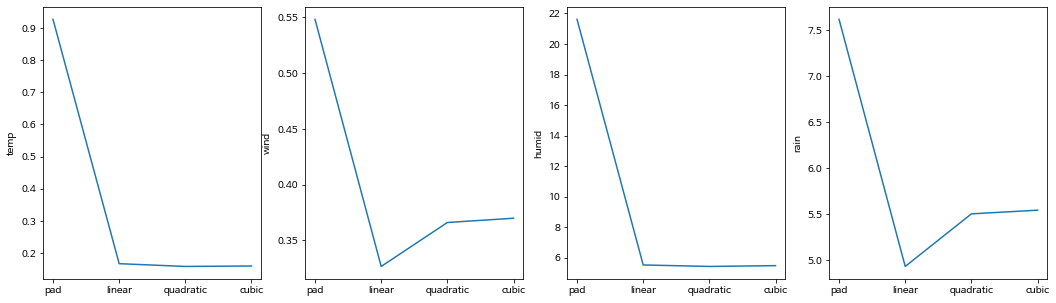

In [ ]:
from sklearn.metrics import mean_squared_error
all_cols_error_dict = dict()
for col in ['temp', 'wind', 'humid', 'rain']:
    methods = ['pad','linear','quadratic','cubic']
    error_dict = compare_interpolate_methods(col, methods, mean_squared_error)
    all_cols_error_dict['{}'.format(col)] = error_dict
    
all_cols_error_df = pd.DataFrame(all_cols_error_dict)

fig, axes = plt.subplots(1,4, figsize = (18,5), sharey=False)
for i in range(len(all_cols_error_df.columns)):
    sns.lineplot(ax=axes[i], data=all_cols_error_df.iloc[:,i].transpose())


In [ ]:
#기온 결측치 채우기
test['temp'] = test['temp'].interpolate(method='quadratic')
#마지막 na 채우기
test['temp'] = test['temp'].interpolate(method='linear')

#풍속 결측치 채우기
test['wind'] = test['wind'].interpolate(method='linear')

#습도 결측치 채우기
test['humid'] = test['humid'].interpolate(method='quadratic')
#마지막 na 채우기
test['humid'] = test['humid'].interpolate(method='linear')

#강수량 결측치 채우기
test['rain'] = test['rain'].interpolate(method='linear')

test.head()

,num,date_time,temp,wind,humid,rain,sunny,month,day,hour,weekday,weekend,cooler,solar
0,1,2020-08-25 00:00:00,27.800000,1.500000,74.000000,0.0,0.0,8,25,0,화,0,0.0,0.0
1,1,2020-08-25 01:00:00,27.806027,1.366667,75.017358,0.0,0.0,8,25,1,화,0,0.0,0.0
2,1,2020-08-25 02:00:00,27.639360,1.233333,76.350691,0.0,0.0,8,25,2,화,0,0.0,0.0
3,1,2020-08-25 03:00:00,27.300000,1.100000,78.000000,0.0,0.0,8,25,3,화,0,0.0,0.0
4,1,2020-08-25 04:00:00,26.787947,1.166667,79.965285,0.0,0.0,8,25,4,화,0,0.0,0.0


In [ ]:
train.head()

,num,date_time,target,temp,wind,humid,rain,sunny,cooler,solar,month,day,hour,weekday,weekend
0,1,2020-06-01 00:00:00,8179.056,17.6,2.5,92.0,0.8,0.0,0.0,0.0,6,1,0,월,0
1,1,2020-06-01 01:00:00,8135.640,17.7,2.9,91.0,0.3,0.0,0.0,0.0,6,1,1,월,0
2,1,2020-06-01 02:00:00,8107.128,17.5,3.2,91.0,0.0,0.0,0.0,0.0,6,1,2,월,0
3,1,2020-06-01 03:00:00,8048.808,17.1,3.2,91.0,0.0,0.0,0.0,0.0,6,1,3,월,0
4,1,2020-06-01 04:00:00,8043.624,17.0,3.3,92.0,0.0,0.0,0.0,0.0,6,1,4,월,0


# 3)불쾌지수 생성
불쾌지수=1.8T-0.55(1-RH)(1.8T-26)+32

(T=기온(°C), RH=상대습도(\%) )

- 불쾌지수란 기온과 습도의 조합으로 사람이 느끼는 온도를 표현한 것으로 온습도지수(THI)라고도 합니다.
- 불쾌지수는 여름철 실내의 무더위의 기준으로서만 사용되고 있을 뿐, 복사나 바람의 조건은 포함되어 있지 않다. 때문에 그 적정한 사용에는 한계가 있다는 점에 유의해야 합니다.
- 해당 데이터가 여름철 데이터인만큼 실내 전력사용량과 관련이 있을 것이라고 판단하였습니다.


날씨 변수를 이용하여 쾌적함의 척도로써 여름철 에어컨 사용 등 전력사용량에 영향을 미칠 것으로 예상되는 불쾌지수를 추가해주겠습니다.

In [ ]:
# 불쾌지수=1.8T-0.55(1-RH)(1.8T-26)+32

train['discomfort'] = 1.8*train['temp'] - 0.55*(1-(train['humid']/100))*(1.8*train['temp']-26) + 32
test['discomfort'] = 1.8*test['temp'] - 0.55*(1-(test['humid']/100))*(1.8*test['temp']-26) + 32

# 4)체감온도 생성
체감온도=13.12+0.6125T-13.947V^(0.16)+0.486TV^(0.16)

(T=기온(°C), V=풍속(m/s))

- 체감온도는 불쾌지수에서 포함하지 않은 바람의 조건을 포함하고 있어 보완해주는 변수라고 판단하였습니다.

In [ ]:
# 체감온도=13.12+0.6125T-13.947V^(0.16)+0.486TV^(0.16)

train['feel_temp']=13.12+0.6215*train['temp']-13.947*train['wind']**0.16+0.486*train['temp']*train['wind']**0.16
test['feel_temp']=13.12+0.6215*test['temp']-13.947*test['wind']**0.16+0.486*test['temp']*test['wind']**0.16

In [ ]:
# (데이터프레임 변수 순서 정리)
train = train[['num','date_time','month', 'day', 'hour','weekday','weekend','temp','humid','discomfort','feel_temp','wind','rain','sunny','cooler','solar','target']]
test = test[['num','date_time','month', 'day', 'hour','weekday','weekend','temp','humid','discomfort','feel_temp','wind','rain','sunny','cooler','solar']]

# 2. Exploratory Data Analysis

## 1)전력사용량 기본 EDA
• 건물들의 평균 전력사용량

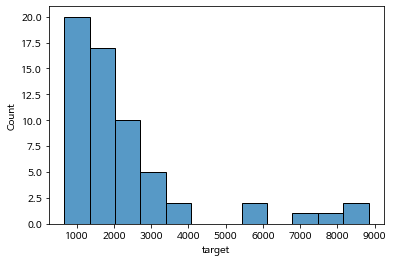

In [ ]:
sns.histplot(train.groupby('num')['target'].mean())

한 시간에 평균 1000kWh를 쓰는 건물부터 9000kWh를 쓰는 건물까지 건물마다 전력사용량의 총량이 매우 다양

In [ ]:
train.groupby(['cooler','solar'])['target'].mean()

cooler  solar
0.0     0.0      2077.030506
        1.0      1582.298192
1.0     0.0      2101.993590
        1.0      2949.726621
Name: target, dtype: float64

일반적으로 비전기냉방설비를 운영하고 태양광을 보유하면 전력사용량이 더 적을 것으로 예상할 수 있습니다. 건물별 거주인구, 유동인구 및 건물면적 등의 정보를 모르기 때문에 주어진 건물 변수와 전력사용량의 관계를 정확히 알 수는 없지만, 예상과 달리 비전기냉방설비운영 여부, 태양광보유 여부가 건물의 전력사용량을 낮춰주진 않는다는 것을 확인할 수 있습니다.

### 비전기냉방설비운영 여부, 태양광보유 여부가 건물의 전력사용량을 낮추지 않으므로 사용하지 않겠다.

## • 건물별 전력사용량과 다른 변수들의 상관관계



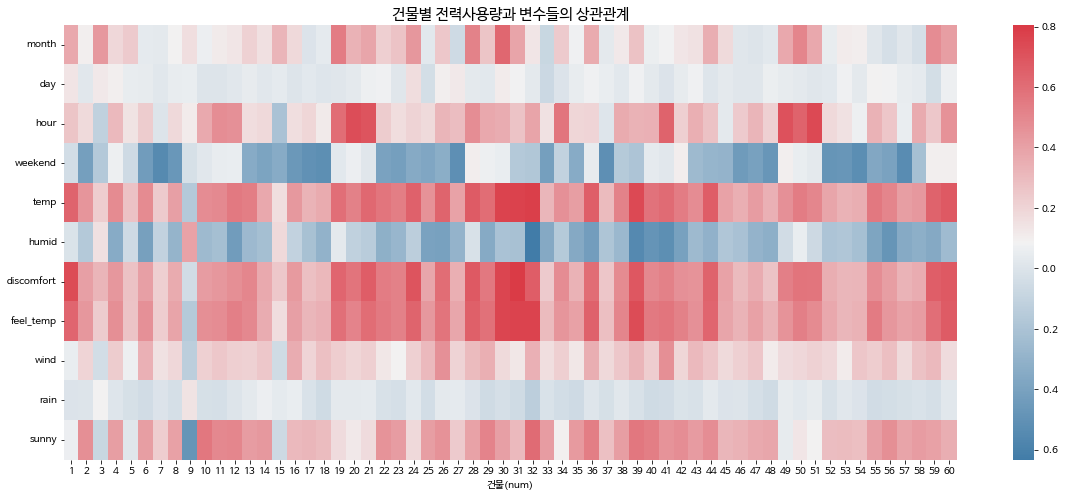

In [ ]:
corr = []
for num in range(1,61):
    df = train[train.num==num]
    num_corr = df.corr()['target']
    num_corr = num_corr.drop(['num','cooler','solar','target'])
    corr.append(num_corr)
corr_df = pd.concat(corr, axis=1).T
corr_df.index = list(range(1,61))

# 시각화
f, ax = plt.subplots(figsize=(20,8))
plt.title("건물별 전력사용량과 변수들의 상관관계", fontsize=15)
sns.heatmap(corr_df.T, cmap=sns.diverging_palette(240,10,as_cmap=True), ax=ax)
plt.xlabel('건물(num)')
plt.show()

위에서 기상청에서 제공하는 생활기상지수 중 불쾌지수와 체감온도를 새로운 변수로 생성했습니다.
이에 따라 기상청에서 제공하는 기준에 따라 불쾌지수와 체감온도를 카테고리화 했습니다.



#### <불쾌지수>

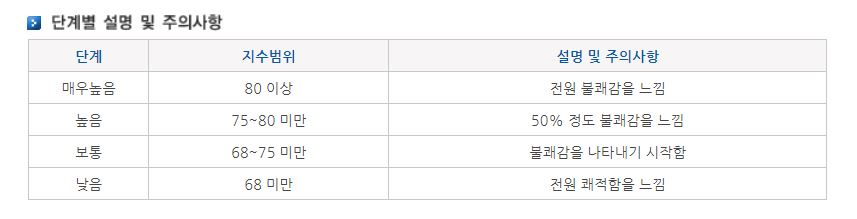

In [ ]:
print(train['discomfort'].min())
print(train['discomfort'].max())

52.344210000000004
86.66179


In [ ]:
train['discomfort_c']=pd.cut(train.discomfort, bins=[50, 68, 75, 80, 90], labels=['낮음', '보통', '높음', '매우높음'])
train.head()

,num,date_time,month,day,hour,weekday,weekend,temp,humid,discomfort,feel_temp,wind,rain,sunny,cooler,solar,target,discomfort_c
0,1,2020-06-01 00:00:00,6,1,0,월,0,17.6,92.0,63.43008,17.813392,2.5,0.8,0.0,0.0,0.0,8179.056,낮음
1,1,2020-06-01 01:00:00,6,1,1,월,0,17.7,91.0,63.56993,17.783091,2.9,0.3,0.0,0.0,0.0,8135.640,낮음
2,1,2020-06-01 02:00:00,6,1,2,월,0,17.5,91.0,63.22775,17.441102,3.2,0.0,0.0,0.0,0.0,8107.128,낮음
3,1,2020-06-01 03:00:00,6,1,3,월,0,17.1,91.0,62.54339,16.958337,3.2,0.0,0.0,0.0,0.0,8048.808,낮음
4,1,2020-06-01 04:00:00,6,1,4,월,0,17.0,92.0,62.39760,16.803848,3.3,0.0,0.0,0.0,0.0,8043.624,낮음


In [ ]:
test['discomfort_c']=pd.cut(train.discomfort, bins=[50, 68, 75, 80, 90], labels=['낮음', '보통', '높음', '매우높음'])
test.tail()

,num,date_time,month,day,hour,weekday,weekend,temp,humid,discomfort,feel_temp,wind,rain,sunny,cooler,solar,discomfort_c
10075,60,2020-08-31 19:00:00,8,31,19,월,0,28.679729,65.645299,78.781928,30.933848,3.566667,0.0,0.8,1.0,1.0,매우높음
10076,60,2020-08-31 20:00:00,8,31,20,월,0,28.313063,66.645299,78.383935,30.484899,3.833333,0.0,0.8,1.0,1.0,높음
10077,60,2020-08-31 21:00:00,8,31,21,월,0,27.900000,68.000000,77.957280,29.974082,4.100000,0.0,0.0,1.0,1.0,높음
10078,60,2020-08-31 22:00:00,8,31,22,월,0,27.900000,68.000000,77.957280,29.974082,4.100000,0.0,0.0,1.0,1.0,높음
10079,60,2020-08-31 23:00:00,8,31,23,월,0,27.900000,68.000000,77.957280,29.974082,4.100000,0.0,0.0,1.0,1.0,높음


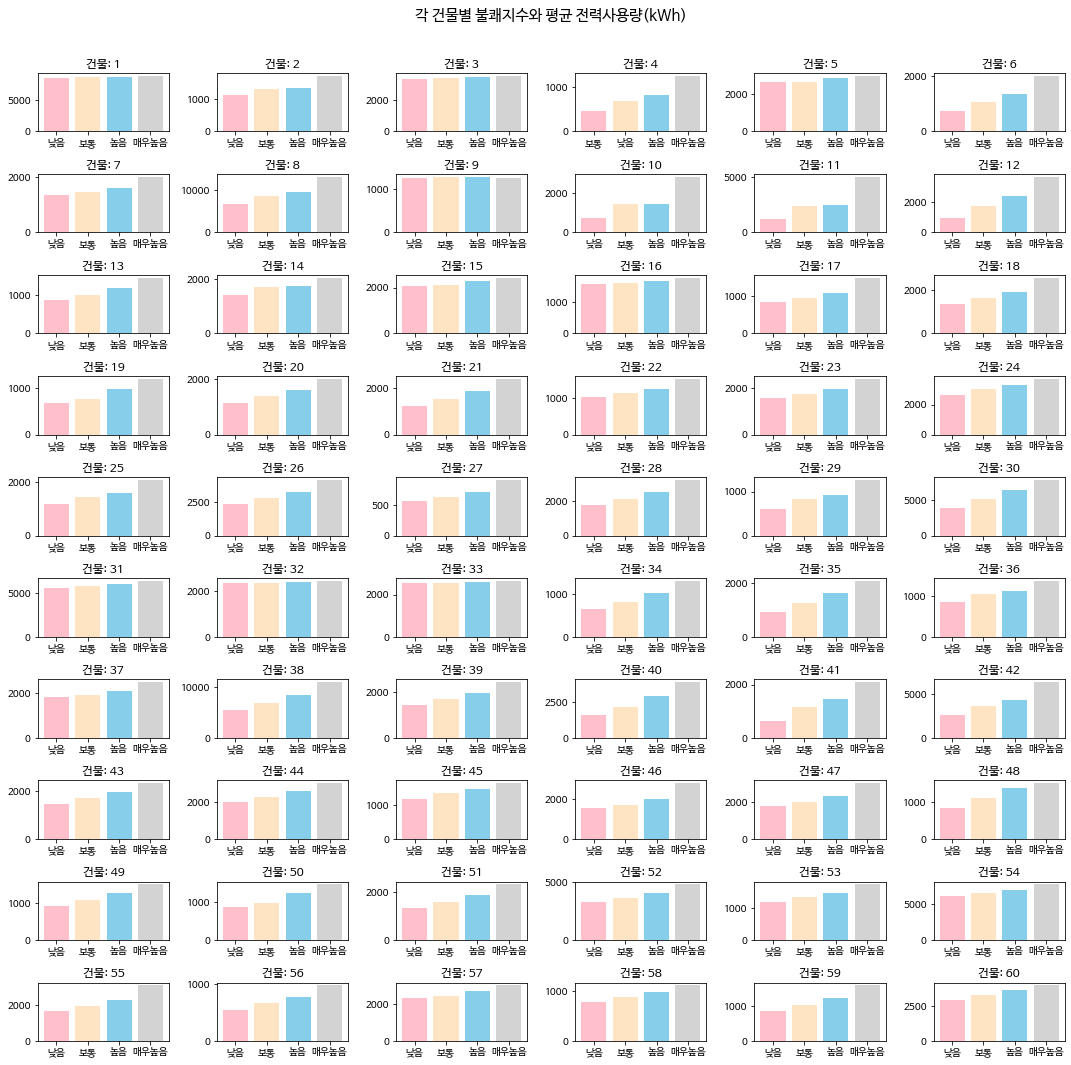

In [ ]:
#불쾌지수
fig = plt.figure(figsize = (15 ,15))
plt.title("각 건물별 불쾌지수와 평균 전력사용량(kWh)", fontsize=15, y=1.05)
plt.axis('off')

colors = ['pink','bisque','skyblue','lightgrey']

for num in range(1,61):
    df = train[train.num==num]
    df_counts = df.groupby('discomfort_c')['target'].mean()
    ax = fig.add_subplot(10,6,num)
    ax.bar(df['discomfort_c'].unique(), df_counts, color=colors)
    ax.set_title(f'건물: {num}')

plt.tight_layout()
plt.show()

#### <체감온도>
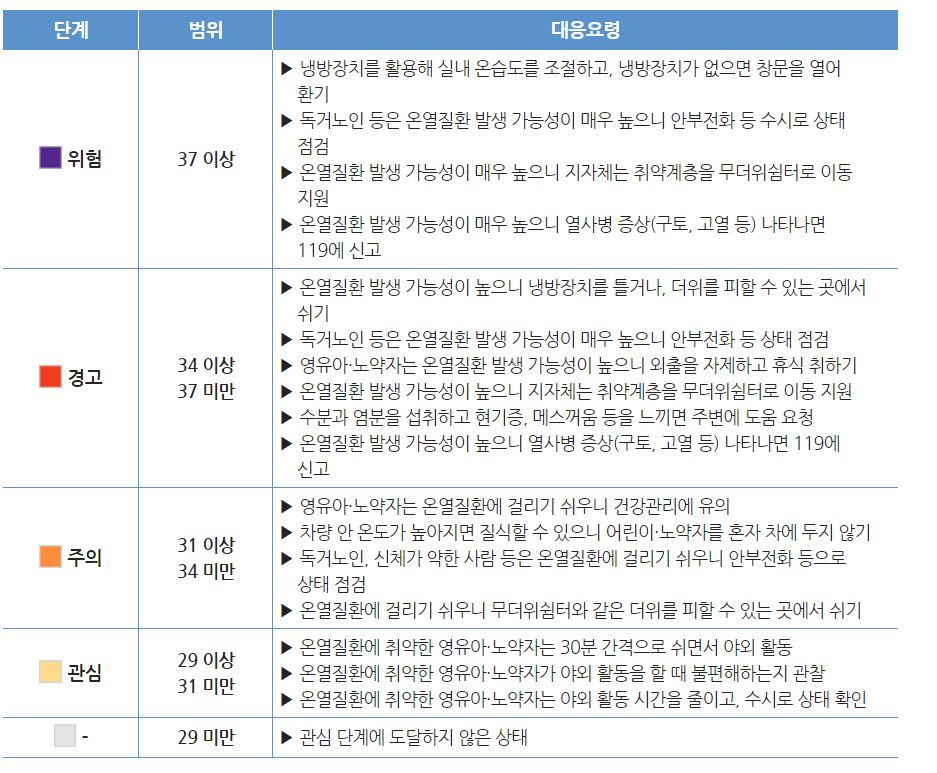


In [ ]:
print(train['feel_temp'].min())
print(train['feel_temp'].max())

11.940652931164212
39.70264167119042


In [ ]:
train.loc[train['feel_temp']>=31, 'feel_temp_b']='매우\n위험'
train.loc[(train['feel_temp']>=28)&(train['feel_temp']<31), 'feel_temp_b']='위험'
train.loc[(train['feel_temp']>=25)&(train['feel_temp']<28), 'feel_temp_b']='경고'
train.loc[(train['feel_temp']>=21)&(train['feel_temp']<25), 'feel_temp_b']='주의'
train.loc[train['feel_temp']<21, 'feel_temp_b']='관심'

train.head()

,num,date_time,month,day,hour,weekday,weekend,temp,humid,discomfort,feel_temp,wind,rain,sunny,cooler,solar,target,discomfort_c,feel_temp_b
0,1,2020-06-01 00:00:00,6,1,0,월,0,17.6,92.0,63.43008,17.813392,2.5,0.8,0.0,0.0,0.0,8179.056,낮음,관심
1,1,2020-06-01 01:00:00,6,1,1,월,0,17.7,91.0,63.56993,17.783091,2.9,0.3,0.0,0.0,0.0,8135.640,낮음,관심
2,1,2020-06-01 02:00:00,6,1,2,월,0,17.5,91.0,63.22775,17.441102,3.2,0.0,0.0,0.0,0.0,8107.128,낮음,관심
3,1,2020-06-01 03:00:00,6,1,3,월,0,17.1,91.0,62.54339,16.958337,3.2,0.0,0.0,0.0,0.0,8048.808,낮음,관심
4,1,2020-06-01 04:00:00,6,1,4,월,0,17.0,92.0,62.39760,16.803848,3.3,0.0,0.0,0.0,0.0,8043.624,낮음,관심


In [ ]:
train['feel_temp_b'].unique()

array(['관심', '주의', '경고', '위험', '매우\n위험'], dtype=object)

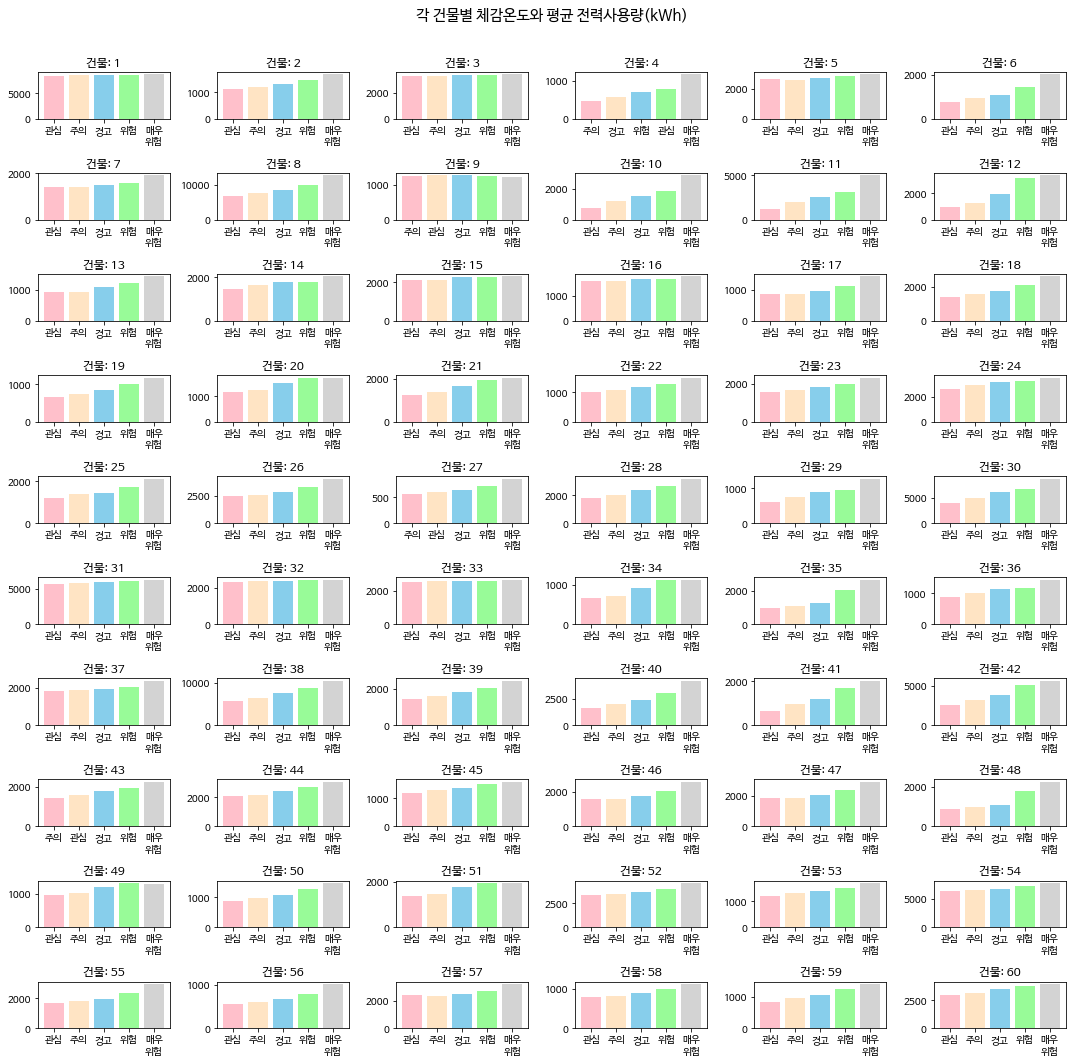

In [ ]:
# 체감온도
fig = plt.figure(figsize = (15 ,15))
plt.title("각 건물별 체감온도와 평균 전력사용량(kWh)", fontsize=15, y=1.05)
plt.axis('off')

colors = ['pink','bisque','skyblue','palegreen','lightgrey']
sensible_temp = train['feel_temp_b'].unique()

for num in range(1,61):
    df = train[train.num==num]
    df_counts = df.groupby('feel_temp_b')['target'].mean()
    df_counts = df_counts.reindex(sensible_temp)
    ax = fig.add_subplot(10,6,num)
    ax.bar(df['feel_temp_b'].unique(), df_counts, color=colors)
    ax.set_title(f'건물: {num}')

plt.tight_layout()
plt.show()

In [ ]:
train['feel_temp_b'].value_counts()


주의        38824
경고        36151
위험        23044
매우\n위험    12344
관심        12037
Name: feel_temp_b, dtype: int64

-----

# 건물 MBTI

In [ ]:
cl_url = 'https://user-images.githubusercontent.com/52409420/122428817-36d36100-cfcd-11eb-971d-125aff553d72.png'
Image(url=cl_url, width=800)

In [ ]:
train_col = ['num', 'date_time','month','day','hour','weekday','weekend','temp','humid','discomfort','feel_temp','wind','rain','sunny','cooler','solar','target','discomfort_c','feel_temp_b']
test_col = ['num', 'date_time','month','day','hour','weekday','weekend','temp','humid','discomfort','feel_temp','wind','rain','sunny','cooler','solar','discomfort_c']

In [ ]:
train.head()

,num,date_time,month,day,hour,weekday,weekend,temp,humid,discomfort,feel_temp,wind,rain,sunny,cooler,solar,target,discomfort_c,feel_temp_b
0,1,2020-06-01 00:00:00,6,1,0,월,0,17.6,92.0,63.43008,17.813392,2.5,0.8,0.0,0.0,0.0,8179.056,낮음,관심
1,1,2020-06-01 01:00:00,6,1,1,월,0,17.7,91.0,63.56993,17.783091,2.9,0.3,0.0,0.0,0.0,8135.640,낮음,관심
2,1,2020-06-01 02:00:00,6,1,2,월,0,17.5,91.0,63.22775,17.441102,3.2,0.0,0.0,0.0,0.0,8107.128,낮음,관심
3,1,2020-06-01 03:00:00,6,1,3,월,0,17.1,91.0,62.54339,16.958337,3.2,0.0,0.0,0.0,0.0,8048.808,낮음,관심
4,1,2020-06-01 04:00:00,6,1,4,월,0,17.0,92.0,62.39760,16.803848,3.3,0.0,0.0,0.0,0.0,8043.624,낮음,관심


In [ ]:
test.head()

,num,date_time,month,day,hour,weekday,weekend,temp,humid,discomfort,feel_temp,wind,rain,sunny,cooler,solar,discomfort_c
0,1,2020-08-25 00:00:00,8,25,0,화,0,27.800000,74.000000,78.602280,29.932264,1.500000,0.0,0.0,0.0,0.0,낮음
1,1,2020-08-25 01:00:00,8,25,1,화,0,27.806027,75.017358,78.746152,29.945969,1.366667,0.0,0.0,0.0,0.0,낮음
2,1,2020-08-25 02:00:00,8,25,2,화,0,27.639360,76.350691,78.661547,29.766042,1.233333,0.0,0.0,0.0,0.0,낮음
3,1,2020-08-25 03:00:00,8,25,3,화,0,27.300000,78.000000,78.340060,29.397313,1.100000,0.0,0.0,0.0,0.0,낮음
4,1,2020-08-25 04:00:00,8,25,4,화,0,26.787947,79.965285,77.770049,28.817477,1.166667,0.0,0.0,0.0,0.0,낮음


# 1. 전처리

## 1.1 시간 변수 추가

In [ ]:
def make_time(train):
    """
    시간 관련 변수를 추가하기 위한 함수
    """
    train['date_time'] = pd.to_datetime(train.date_time)
    
    train['month'] = train.date_time.dt.month                    # 월(숫자)
    train['day'] = train.date_time.dt.day                        # 일(숫자)
    train['hour'] = train.date_time.dt.hour                      # 시(숫자)
    train['weekday'] = train.date_time.dt.weekday                # 요일(숫자)
    train['dayofyear'] = train.date_time.dt.dayofyear            # 연 기준 몇일째(숫자)
    
    return train

In [ ]:
train = make_time(train)
test = make_time(test)

In [ ]:
# 6월 6일은 현충일, 8월 15일은 광복절, 8월 17일은 임시공휴일
# 휴일이 많지 않으니, 주말에 포함시키겠습니다.

train.loc[train.weekday >= 5, 'holiday'] = 1
train.loc[train.weekday < 5, 'holiday'] = 0
train.loc[(train.month == 8) & (train.day == 17), 'holiday'] = 1

test.loc[test.weekday >= 5, 'holiday'] = 1
test.loc[test.weekday < 5, 'holiday'] = 0

# 2. 분석

본격적인 분석에 앞서 시간의 흐름에 따라 데이터가 어떤 흐름을 보이는지 간단히 살펴보겠습니다.

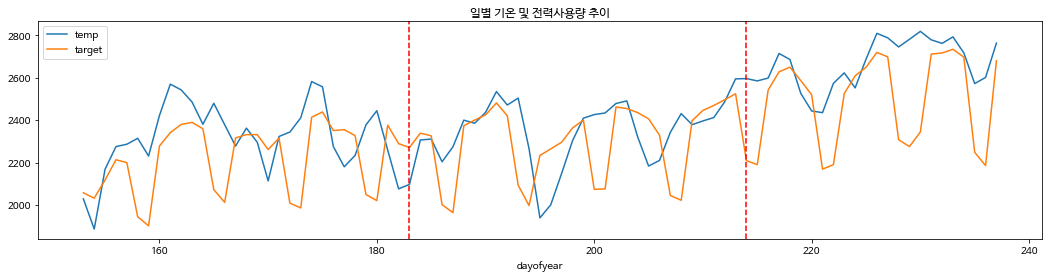

In [ ]:
(train.groupby(['dayofyear'])['temp'].mean()*100).plot(figsize=(18, 4))
train.groupby(['dayofyear'])['target'].mean().plot(figsize=(18, 4))
plt.legend(['temp', 'target'])
plt.axvline(x = 183, color = 'r', linestyle = '--',)
plt.axvline(x = 214, color = 'r', linestyle = '--',)
plt.title('일별 기온 및 전력사용량 추이')
plt.show()

일간 평균 기온과 전력 사용량을 6, 7, 8월로 구분한 플롯입니다.<br>
7월 초순이 끝날 무렵 바닥을 쳤다가, 그 이후로 꾸준히 상승하는 경향을 보입니다.<br>
일반적으로 전력 사용량은 기온과 비슷한 흐름으로 흘러갑니다.

In [ ]:
# 8월 31일까지의 강수량과 일조량을 보기 위해 concat 사용
result1 = pd.concat([train,test])
result1.tail()

,num,date_time,month,day,hour,weekday,weekend,temp,humid,discomfort,...,wind,rain,sunny,cooler,solar,target,discomfort_c,feel_temp_b,dayofyear,holiday
10075,60,2020-08-31 19:00:00,8,31,19,0,0,28.679729,65.645299,78.781928,...,3.566667,0.0,0.8,1.0,1.0,NaN,매우높음,NaN,244,0.0
10076,60,2020-08-31 20:00:00,8,31,20,0,0,28.313063,66.645299,78.383935,...,3.833333,0.0,0.8,1.0,1.0,NaN,높음,NaN,244,0.0
10077,60,2020-08-31 21:00:00,8,31,21,0,0,27.900000,68.000000,77.957280,...,4.100000,0.0,0.0,1.0,1.0,NaN,높음,NaN,244,0.0
10078,60,2020-08-31 22:00:00,8,31,22,0,0,27.900000,68.000000,77.957280,...,4.100000,0.0,0.0,1.0,1.0,NaN,높음,NaN,244,0.0
10079,60,2020-08-31 23:00:00,8,31,23,0,0,27.900000,68.000000,77.957280,...,4.100000,0.0,0.0,1.0,1.0,NaN,높음,NaN,244,0.0


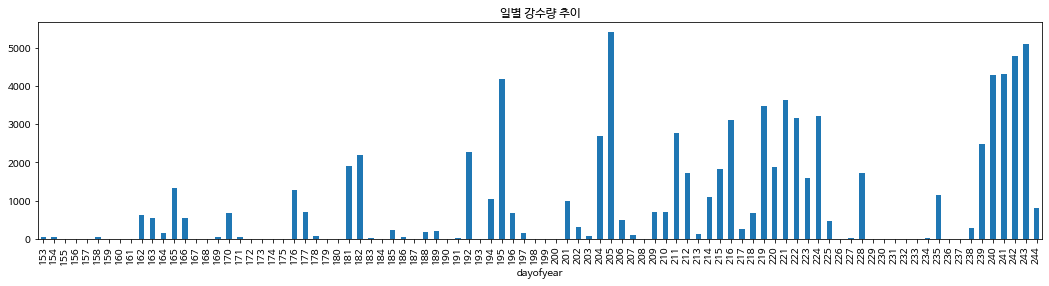

In [ ]:
(result1.groupby(['dayofyear'])['rain'].sum()).plot(kind='bar', figsize=(18, 4))
plt.title('일별 강수량 추이')
plt.show()

7월 말부터 8월 중순까지는 쉬지 않고 매일 비가 내렸습니다. 장마라고 충분히 표현할 수 있을 것 같습니다.

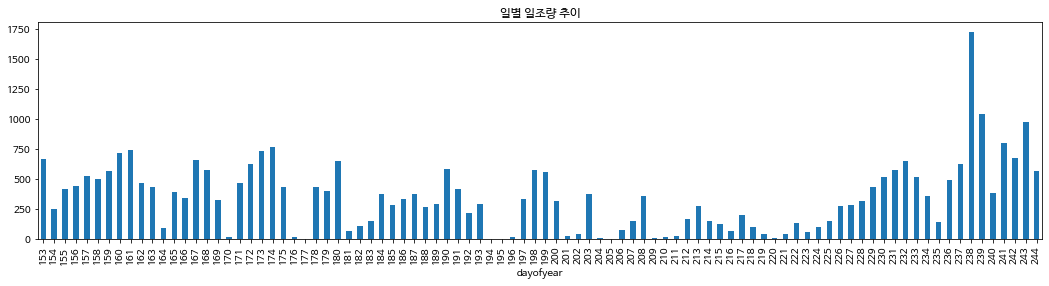

In [ ]:
result1.groupby(['dayofyear'])['sunny'].sum().plot(kind='bar', figsize=(18, 4))
plt.title('일별 일조량 추이')
plt.show()

일별 일조시간을 바차트로 그려본 것입니다. 장마 시즌에는 일조시간이 줄어들며, 6월과 8월 말에 높은 일조시간을 보이는 것을 알 수 있습니다.

- 6월, 7월보다 8월 말로 갈수록 더욱 기온은 높아집니다.
- 기온이 높아짐에 따라 전력 사용량도 같이 높아지는 경향을 보입니다.
- 7월 말부터 장마의 영향을 받으며 비내리는 날이 많아집니다.
- 8월 말에는 장마가 끝나며, 비가 오는 날이 거의 없습니다.
- 일조 시간은 6월에 가장 높았고, 장마 시즌에 줄어들었으며, 8월에 다시 오르고 있습니다.

## 2.1 건물별 전력 사용 패턴 분석

### 2.1.1 군집화를 통한 유형 분류

kmeans 외에도 DBSCAN, 계층적군집 등을 사용해보았으나, kmeans가 가장 좋은 군집화를 보였습니다.

[참고](https://www.dacon.io/competitions/official/235736/codeshare/2743?page=1&dtype=recent)

In [ ]:
train_origin = train.copy()

In [ ]:
# 정확한 군집화를 위한 스케일링
for i in range(1, 61):
    mean_ = train.loc[train.num == i].target.mean()
    std_ = train.loc[train.num == i].target.std()
    train.loc[train.num == i, 'target'] = ((train.loc[train.num == i, 'target']) - mean_) / std_

In [ ]:
# 요일에 따른 평균 값 산출
weekday_mean = (
    train.groupby(['num', 'weekday'])['target'].mean()
    .reset_index()
    .pivot('num', 'weekday', 'target')
    .reset_index()
)

In [ ]:
# 시간에 따른 평균 값 산출
hour_mean = (
    train.groupby(['num', 'hour'])['target'].mean()
    .reset_index()
    .pivot('num', 'hour', 'target')
    .reset_index()
    .drop('num', axis=1)
)

In [ ]:
# 요일별, 시간별 평균 전력  사용량 테이블 구축
cl_df = pd.concat([weekday_mean, hour_mean], axis=1)

In [ ]:
# 보기 편하게 컬럼 이름 지정
columns = (
    ['num']
    + ['day_mean_' + str(i) for i in range(7)]
    + ['hour_mean_' + str(i) for i in range(24)]
)

cl_df.columns = columns

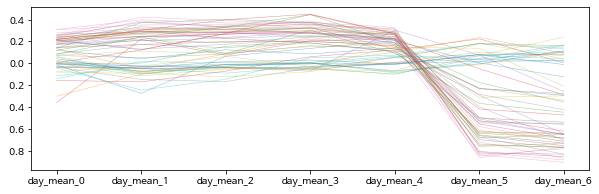

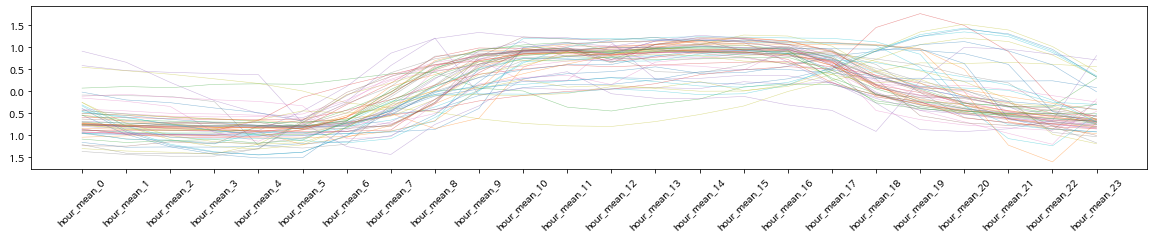

In [ ]:
# 시각화를 통한 확인
fig = plt.figure(figsize = (10,3))
for i in range(len(cl_df)):
    plt.plot(cl_df.iloc[i, 1:8], alpha = 0.5, linewidth = 0.5)
    
fig = plt.figure(figsize = (20,3))
for i in range(len(cl_df)):
    plt.plot(cl_df.iloc[i, 8:32], alpha = 0.5, linewidth = 0.5)
    plt.xticks(rotation=45)

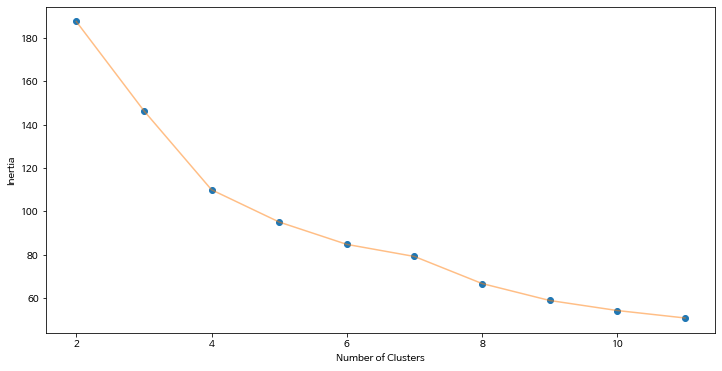

In [ ]:
# elbow method를 통해 군집의 개수 결정
def change_n_clusters(n_clusters, data):
    sum_of_squared_distance = []
    for n_cluster in n_clusters:
        kmeans = KMeans(n_clusters=n_cluster)
        kmeans.fit(data)
        sum_of_squared_distance.append(kmeans.inertia_)
        
    plt.figure(1 , figsize = (12, 6))
    plt.plot(n_clusters , sum_of_squared_distance , 'o')
    plt.plot(n_clusters , sum_of_squared_distance , '-' , alpha = 0.5)
    plt.xlabel('Number of Clusters')
    plt.ylabel('Inertia')

change_n_clusters([2,3,4,5,6,7,8,9,10,11], cl_df.iloc[:,1:])

In [ ]:
# 엘보우 포인트를 통해 kmeans 클러스터링
model = KMeans(n_clusters = 4, random_state = 42)  # 옐보우 포인트 : 4 (가장 좋았음)
pred = model.fit_predict(cl_df.iloc[:, 1:])

In [ ]:
# 값 할당
cl_df['km_cluster'] = pred

In [ ]:
# 기존 train set과 merge
train_cl = pd.merge(train, cl_df[['num', 'km_cluster']], how='left', on='num')

In [ ]:
test_cl = test.copy()

In [ ]:
# test set에도 클러스터 값 할당
for i in range(1, 61):
    test_cl.loc[test_cl.num == i, 'km_cluster'] = (
        train_cl.loc[train_cl.num == i, 'km_cluster'].max()
    )

In [ ]:
# 군집별 분석을 위한 4개의 데이터셋 할당
km_0 = list(train_cl.loc[train_cl.km_cluster == 0].num.unique())
km_1 = list(train_cl.loc[train_cl.km_cluster == 1].num.unique())
km_2 = list(train_cl.loc[train_cl.km_cluster == 2].num.unique())
km_3 = list(train_cl.loc[train_cl.km_cluster == 3].num.unique())

### 2.1.2 군집 유형 비교

In [ ]:
train_cl.groupby(['km_cluster'])['num'].count().to_frame()/2040

,num
km_cluster,
0,7.0
1,33.0
2,5.0
3,15.0


1번 유형이 가장 많은 비중을 차지하며, 다음으로 3번, 2번, 0번 순입니다.

유형별로 건물을 살펴보겠습니다.

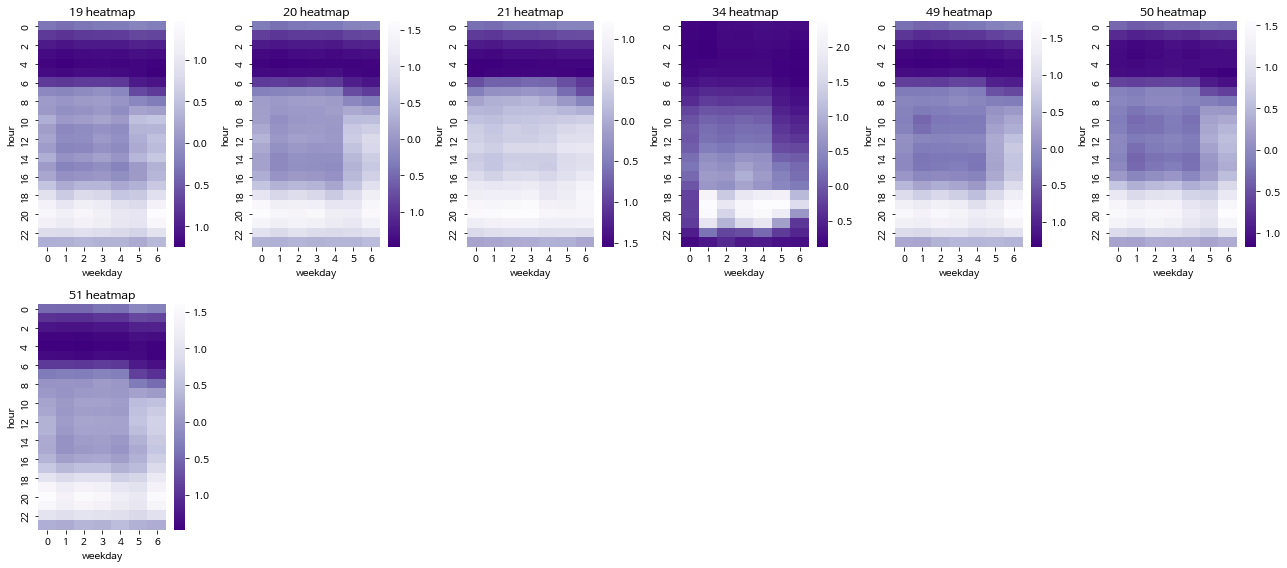

In [ ]:
# 기존:활동가형(1:5.0) → 0:5.0)
fig = plt.figure(figsize=(18, np.ceil(len(km_0)/6)*4))
for i, n in enumerate(km_0):
    plt.subplot(np.ceil(len(km_0)/6), 6, i+1)
    plt.title("{} heatmap".format(n))
    sns.heatmap(train.loc[train.num == n].groupby(['weekday', 'hour'])['target'].mean().unstack().T, cmap='Purples_r')
    plt.tight_layout()

- 0번 유형은 상업형 건물인 외교관형 건물과 유사하지만, 밤에 전력사용량이 집중되어 있습니다.
- 평일 낮에는 사용량이 낮은 편이며, 평일 밤과 주말 동안 전력사용량이 증가합니다.
- 자정까지 전력사용량이 이어지는 것으로 보아 밤 늦게까지 전력을 사용하는 건물유형입니다.

In [ ]:
cl_3_url = 'https://user-images.githubusercontent.com/52409420/122412360-747dbd00-cfc0-11eb-8651-36b9d616f6f7.png'
Image(url=cl_3_url, width=250)

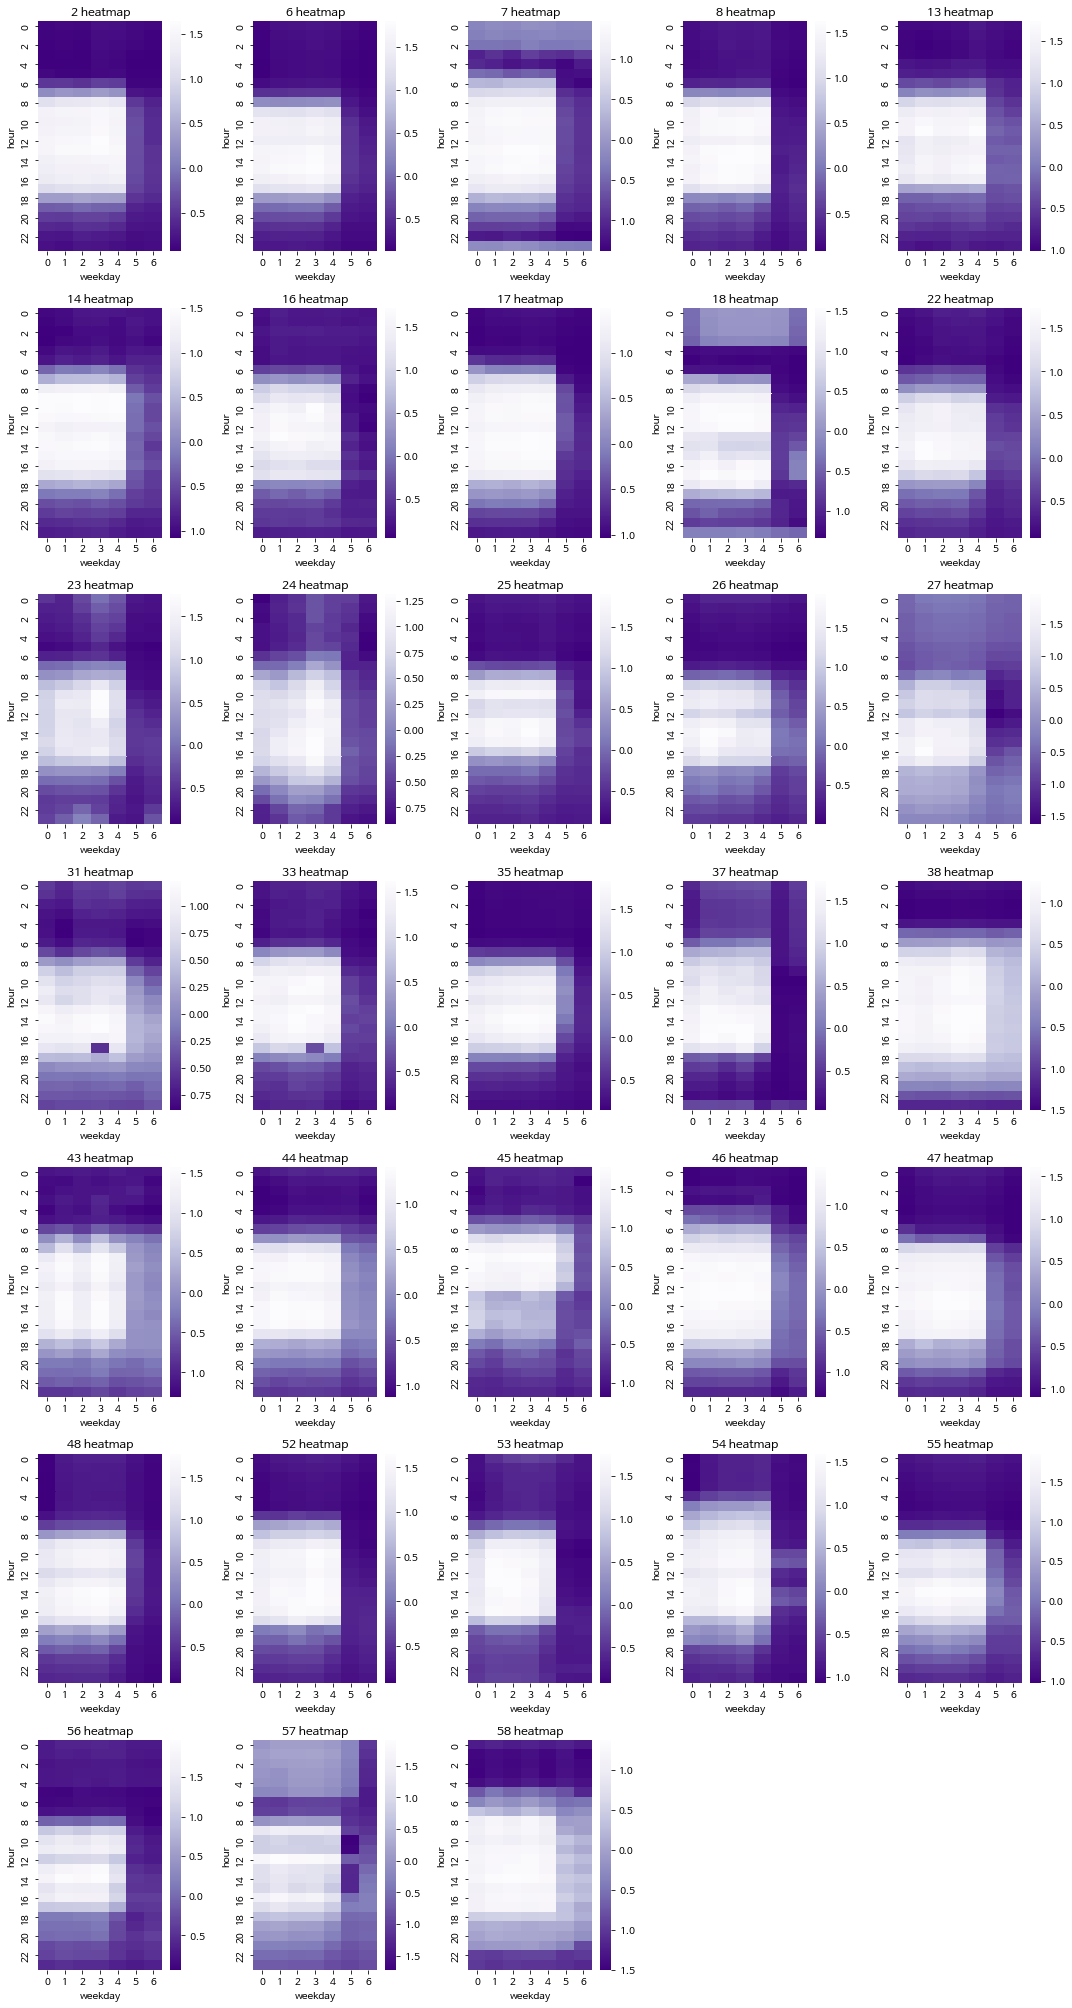

In [ ]:
# 기존:전략가(0:33.0) → 1:33.0)
fig = plt.figure(figsize=(15, np.ceil(len(km_1)/5)*4))
for i, n in enumerate(km_1):
    plt.subplot(np.ceil(len(km_1)/5), 5, i+1)
    plt.title("{} heatmap".format(n))
    sns.heatmap(train.loc[train.num == n].groupby(['weekday', 'hour'])['target'].mean().unstack().T, cmap='Purples_r')
    plt.tight_layout()

- 건물별로 편차는 존재하지만, 대체로 평일 업무 시간대에 전력사용량이 집중되어 있습니다.
- 그 외의 시간과 요일에는 전력사용량이 급격히 감소하는 것을 알 수 있습니다.

In [ ]:
cl_0_url = 'https://user-images.githubusercontent.com/52409420/122412337-6fb90900-cfc0-11eb-9b1a-c188306a14e7.png'
Image(url=cl_0_url, width=250)

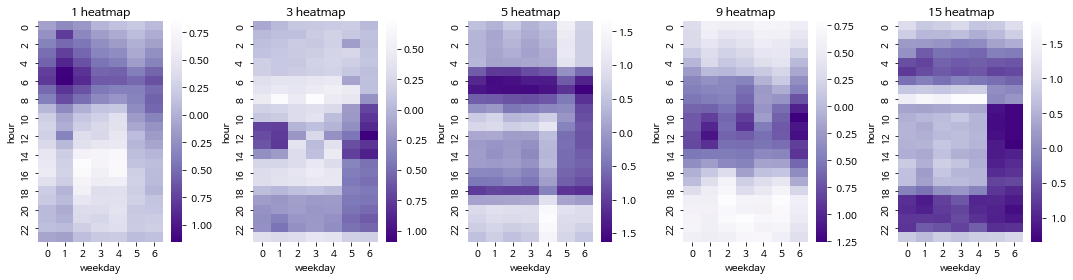

In [ ]:
# 기본:연예인(탐험가형)(3:7.0 → 2:7.0)
fig = plt.figure(figsize=(15, np.ceil(len(km_2)/5)*4))
for i, n in enumerate(km_2):
    plt.subplot(np.ceil(len(km_2)/5), 5, i+1)
    plt.title("{} heatmap".format(n))
    sns.heatmap(train.loc[train.num == n].groupby(['weekday', 'hour'])['target'].mean().unstack().T, cmap='Purples_r')
    plt.tight_layout()

- 정체를 알 수 없는 2번 클러스터입니다. 건물 모두 사용 패턴이 다소 다르며, 예상치 못한 시간에 전력 사용이 없습니다.
- 다른 유형에 끼지 못한 다양한 패턴의 건물들이 모인 것 같습니다.
- 사실 같은 유형으로 묶는 것도 다소 건물들에게 미안하긴 합니다.

In [ ]:
cl_1_url = 'https://user-images.githubusercontent.com/52409420/122412417-80697f00-cfc0-11eb-9c71-6bffb406d666.png'
Image(url=cl_1_url, width=250)

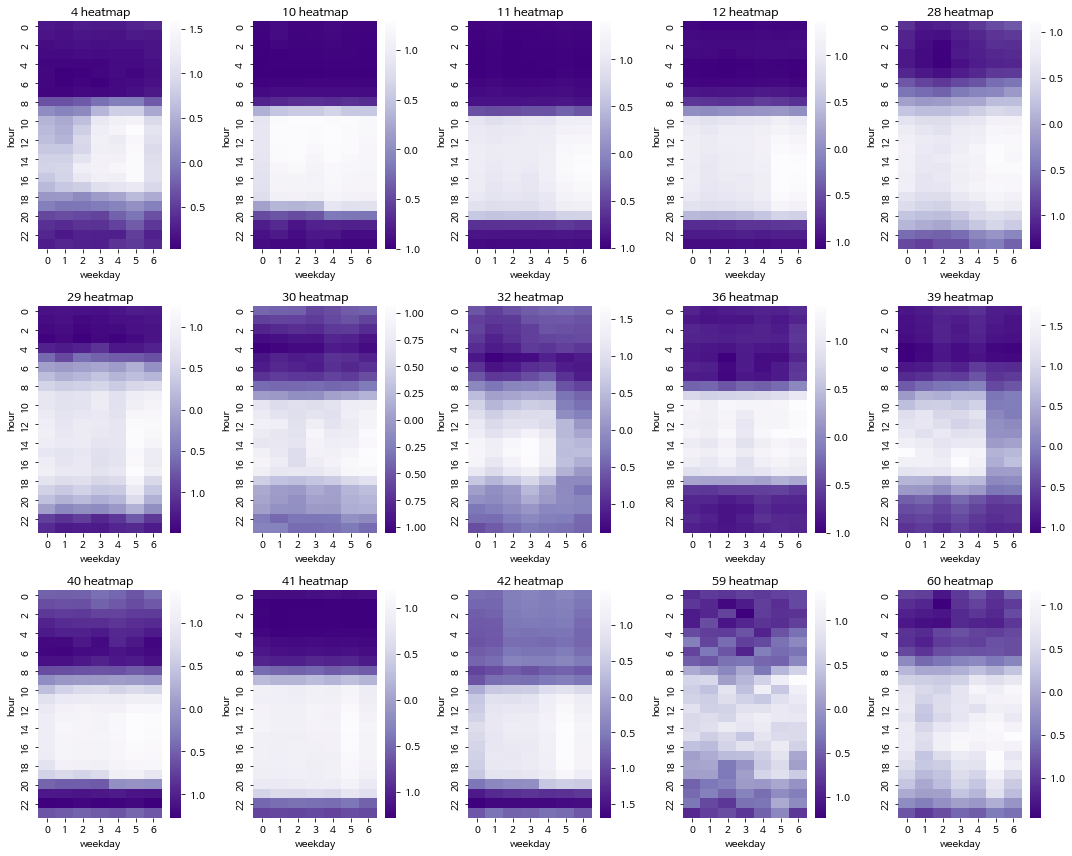

In [ ]:
# 기존:외교관(관리자형)(2:15.0 → 3:15.0)
fig = plt.figure(figsize=(15, np.ceil(len(km_3)/5)*4))
for i, n in enumerate(km_3):
    plt.subplot(np.ceil(len(km_3)/5), 5, i+1)
    plt.title("{} heatmap".format(n))
    sns.heatmap(train.loc[train.num == n].groupby(['weekday', 'hour'])['target'].mean().unstack().T, cmap='Purples_r')
    plt.tight_layout()

- 평일과 주말을 구분하지 않고 전력사용량이 이어지고 있습니다.
- 특히나 10~10 시간대에 주로 전력사용량이 집중되어 있습니다.
- 오피스형 건물의 패턴을 보였던 전략가형 건물과는 다르게, 상업용 건물이라고 추정됩니다.

In [ ]:
cl_2_url = 'https://user-images.githubusercontent.com/52409420/122412399-7b0c3480-cfc0-11eb-9cae-c7090bfb37da.png'
Image(url=cl_2_url, width=250)

- 평일, 주말 상관없이 상업 시간대에 열심히 활동하는 사교적인 외교관형 건물이라고 하겠습니다.

### 2.1.3 정리

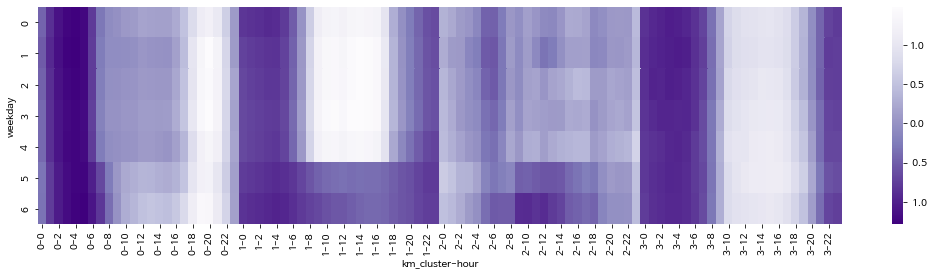

In [ ]:
# 활동가 / 전략가 / 연예인 / 외교관

plt.figure(figsize=(18, 4))
sns.heatmap(train_cl.groupby(['km_cluster', 'hour', 'weekday'])['target'].mean().unstack().T, cmap='Purples_r')
plt.show()

- 전략가형 건물
    1. 업무 시간인 9-6 시간대에 가장 높은 전력사용량을 보이며
    2. 주말과 새벽 시간에 사용량이 줄어드는 것을 알 수 있습니다.
    3. **고층에는 사무실, 저층에는 상업 시설이 공존하는 오피스형 건물로 추정합니다.**<br>
<br>
- 연예인형 건물
    1. 같은 유형의 건물들로 뭉쳤지만, 하나로 묶을 수 없는 다양한 패턴의 전력사용량을 보이며,
    2. 다른 유형의 건물들과는 섞일 수 없는 독특한 패턴을 보이는 건물들입니다.<br>
<br>
- 외교관형 건물
    1. 상업 시간인 10-10 시간대에 가장 높은 전력사용량을 보이며
    2. 평일주말 구분이 없이 유지됩니다. 그러나 심야에는 문을 닫습니다.
    3. **일반적인 상업 시설이 존재하는 상가형 건물로 추정합니다.**<br>
<br>
- 활동가형 건물
    1. 외교관형 건물과 비슷하지만, 저녁 시간에 전력 사용량이 집중되어 있으며,
    2. 심야에도 전력 사용량이 이어지는 차이점을 보입니다.
    3. 즉, 상업 시설이지만 밤 늦게 영업하는 **술집 등이 있는 번화가형 건물로 추정합니다.**

재미로 MBTI 유형을 빗대어서 4개의 유형을 분류해보았습니다.<br>
건물의 유형에 따라 특정 시간대에 전력 사용량이 몰리는 것을 알 수 있고,<br>
그를 통해 패턴과 용도를 적당히 유추할 수 있습니다.<br>
유형별로 전력 사용량이 몰리는 시간대를 중심으로 전력 사용을 절약할 수 있는 방법이 필요할 것 같습니다.

## 2.2 시간 변수에 대한 분석

## 2.2.1 유사한 패턴을 보이던 전략가형, 외교관형, 활동가형 건물들


Text(0.5, 1.0, '활동가형_시간별_라인차트')

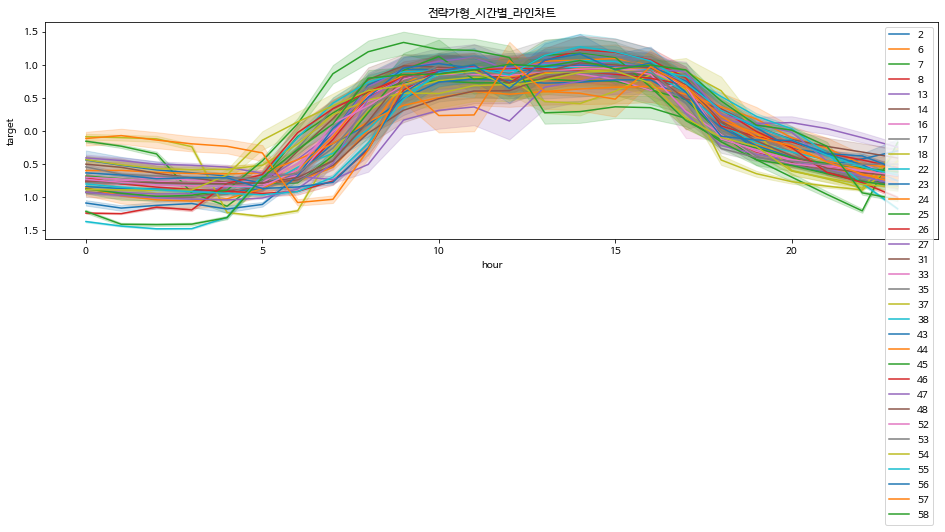

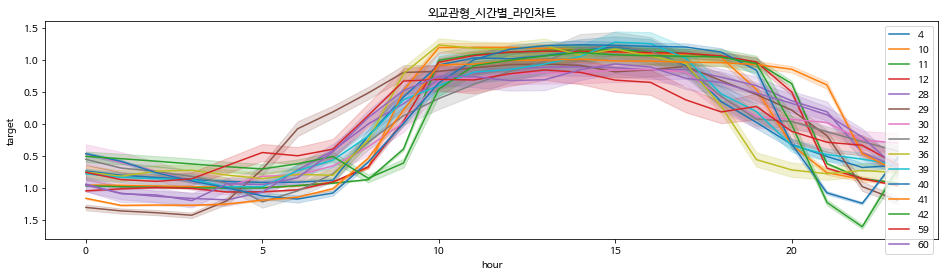

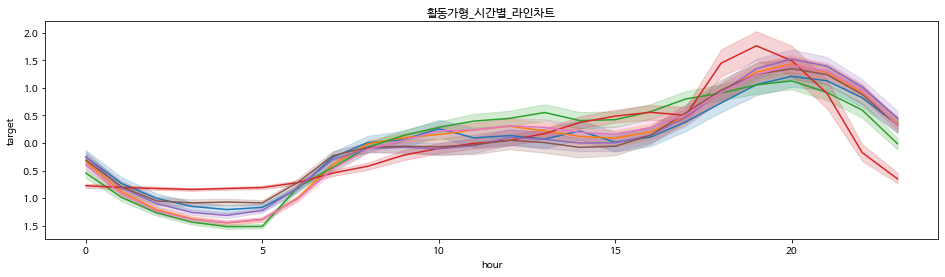

In [ ]:
fig = plt.figure(figsize = (16,4))
for i in list(train_cl.loc[train_cl.km_cluster == 1].num.unique()):
    sns.lineplot(data=train_cl.loc[(train_cl.km_cluster == 1) & (train_cl.num == i)], x='hour', y='target')
plt.title('전략가형_시간별_라인차트')
plt.legend(list(train_cl.loc[train_cl.km_cluster == 1].num.unique()))
    
fig = plt.figure(figsize = (16,4))
for i in list(train_cl.loc[train_cl.km_cluster == 3].num.unique()):
    sns.lineplot(data=train_cl.loc[(train_cl.km_cluster == 3) & (train_cl.num == i)], x='hour', y='target')
plt.title('외교관형_시간별_라인차트')
plt.legend(list(train_cl.loc[train_cl.km_cluster == 3].num.unique()))

fig = plt.figure(figsize = (16,4))
for i in list(train_cl.loc[train_cl.km_cluster == 0].num.unique()):
    sns.lineplot(data=train_cl.loc[(train_cl.km_cluster == 0) & (train_cl.num == i)], x='hour', y='target')
plt.title('활동가형_시간별_라인차트')

- 다소 편차는 존재하지만, 대체로 유형별로 비슷한 패턴을 보이고 있습니다.
- 활동가형에서는 34번이 다른 양상을 보이고 있습니다.

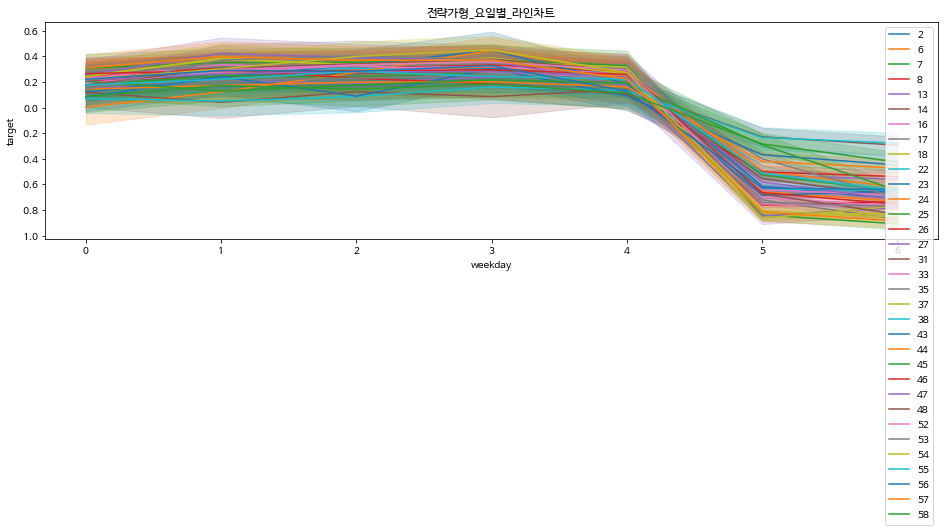

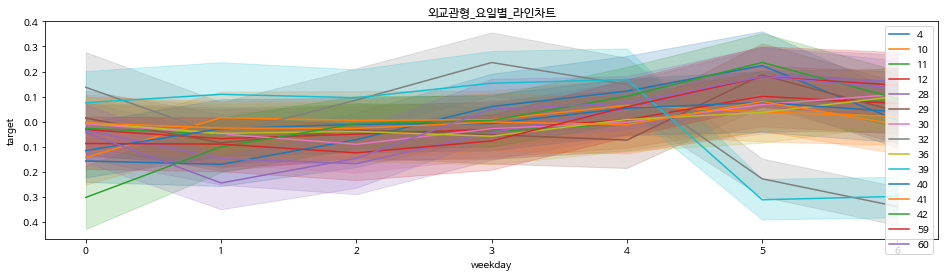

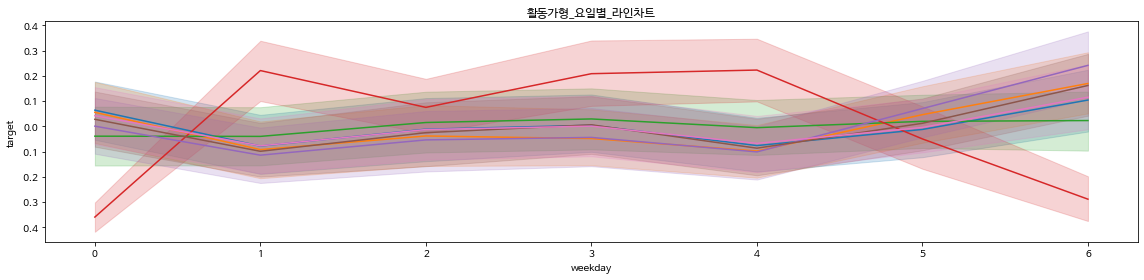

In [ ]:
fig = plt.figure(figsize = (16,4))
for i in list(train_cl.loc[train_cl.km_cluster == 1].num.unique()):
    sns.lineplot(data=train_cl.loc[(train_cl.km_cluster == 1) & (train_cl.num == i)], x='weekday', y='target')
plt.title('전략가형_요일별_라인차트')
plt.legend(list(train_cl.loc[train_cl.km_cluster == 1].num.unique()))

fig = plt.figure(figsize = (16,4))
for i in list(train_cl.loc[train_cl.km_cluster == 3].num.unique()):
    sns.lineplot(data=train_cl.loc[(train_cl.km_cluster == 3) & (train_cl.num == i)], x='weekday', y='target')
plt.title('외교관형_요일별_라인차트')
plt.legend(list(train_cl.loc[train_cl.km_cluster == 3].num.unique()))

fig = plt.figure(figsize = (16,4))
for i in list(train_cl.loc[train_cl.km_cluster == 0].num.unique()):
    sns.lineplot(data=train_cl.loc[(train_cl.km_cluster == 0) & (train_cl.num == i)], x='weekday', y='target')
plt.title('활동가형_요일별_라인차트')
plt.tight_layout()

- 요일별 평균 전력 사용량에서도 유형별로 유사한 패턴을 보입니다.
- 외교관형에서 39번과 32번이 다소 상이한 패턴을 보이고 있습니다. 전력가형과 오히려 유사해보입니다.
- 활동가형에서는 34번이 다소 상이한 패턴을 보입니다. 어느 유형에도 속하지 않는 패턴입니다.

In [ ]:
outlier_sample = [2, 4, 39, 32, 34] # 이부분 분석해서 샘플을 바꿔야 할수도 있습니다

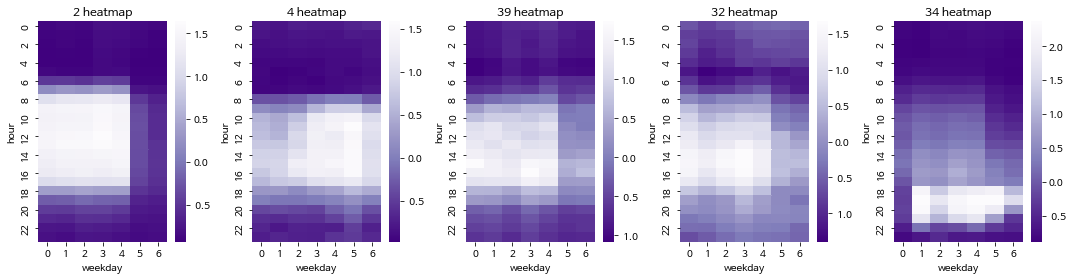

In [ ]:
fig = plt.figure(figsize=(15, np.ceil(len(outlier_sample)/5)*4))
for i, n in enumerate(outlier_sample):
    plt.subplot(np.ceil(len(outlier_sample)/5), 5, i+1)
    plt.title("{} heatmap".format(n))
    sns.heatmap(train.loc[train.num == n].groupby(['weekday', 'hour'])['target'].mean().unstack().T, cmap='Purples_r')
    plt.tight_layout()

- 39, 32번 건물은 같은 유형인 4번에 비해 주말 전력 사용량이 많지 않습니다. 다만 전략가형의 2번과는 다르게 주말에도 전력 사용량이 일부 유지되는 패턴입니다.
- 34번은 저녁에만 영업을 하는 유형의 건물입니다.

### 2.2.2 유사한 패턴을 보이지 않던 연예인형의 건물들

연예인형의 건물들을 따로 살펴보겠습니다.

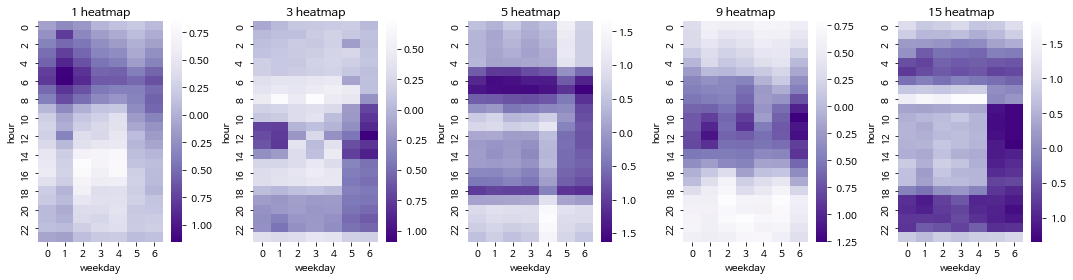

In [ ]:
# 연예인(활동가형)
fig = plt.figure(figsize=(15, np.ceil(len(km_2)/5)*4))
for i, n in enumerate(km_2):
    plt.subplot(np.ceil(len(km_2)/5), 5, i+1)
    plt.title("{} heatmap".format(n))
    sns.heatmap(train.loc[train.num == n].groupby(['weekday', 'hour'])['target'].mean().unstack().T, cmap='Purples_r')
    plt.tight_layout()

In [ ]:
# 기상의 영향을 받지 않는 연예인형의 건물들과
# 기상의 영향을 매우 많이 받으며, 외교관형의 건물인 32번 건물 
# 비교를 위한 전략가형의 2번 건물, 활동가형의 20번 건물
weird_sample = [2, 20, 32, 1, 3, 5, 9, 15]

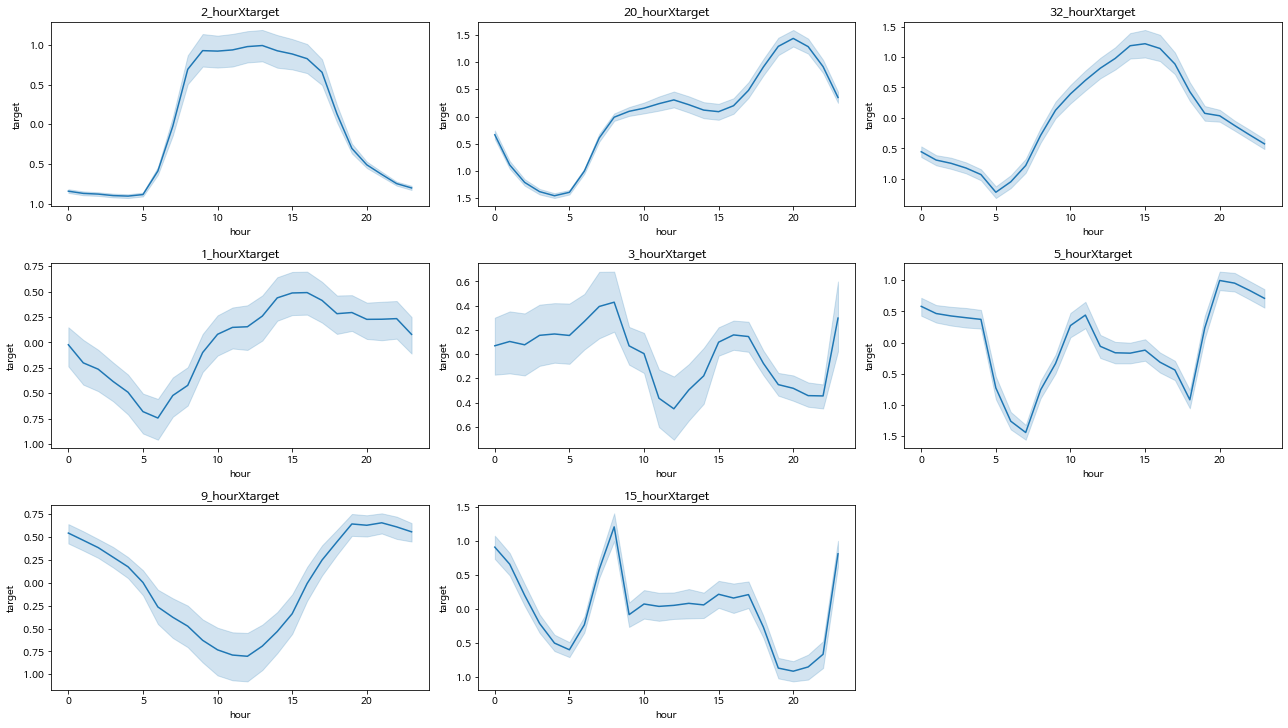

In [ ]:
fig = plt.figure(figsize=(18, 40))
for i, n in enumerate(weird_sample):
    plt.subplot(12, 3, i+1)
    plt.title("{}_hourXtarget".format(n))
    sns.lineplot(data=train.loc[train.num == n], x='hour', y='target')
    plt.tight_layout()

보통의 경우에는 32번 건물처럼 5시 즈음에 저점을 찍고, 15시 즈음에 고점을 찍는 동산형 모양을 띕니다.

- 1번 건물은 32번과 그나마 유사합니다. 다만 편차가 조금 클 뿐이고, 범위가 넓게 형성되고 있습니다.
- 3번 건물은 아침에 고점을 찍고, 정오에 저점을 찍었다가, 저녁에 다시 올랐다가 밤에 다시 내려갑니다. 거리를 돌아다니면서 이런 유형의 건물이 무엇이 있을까 고민하고 있지만, 아직은 찾지 못했습니다.
- 9번 건물은 낮에 전력을 거의 사용하지 않고, 밤부터 급격히 상승합니다. 밤에만 문을 여는 건물이 있는 것 같습니다.
- 15번 건물 또한 아침에 고점을 찍습니다. 그리고 밤에 다시 상승합니다.

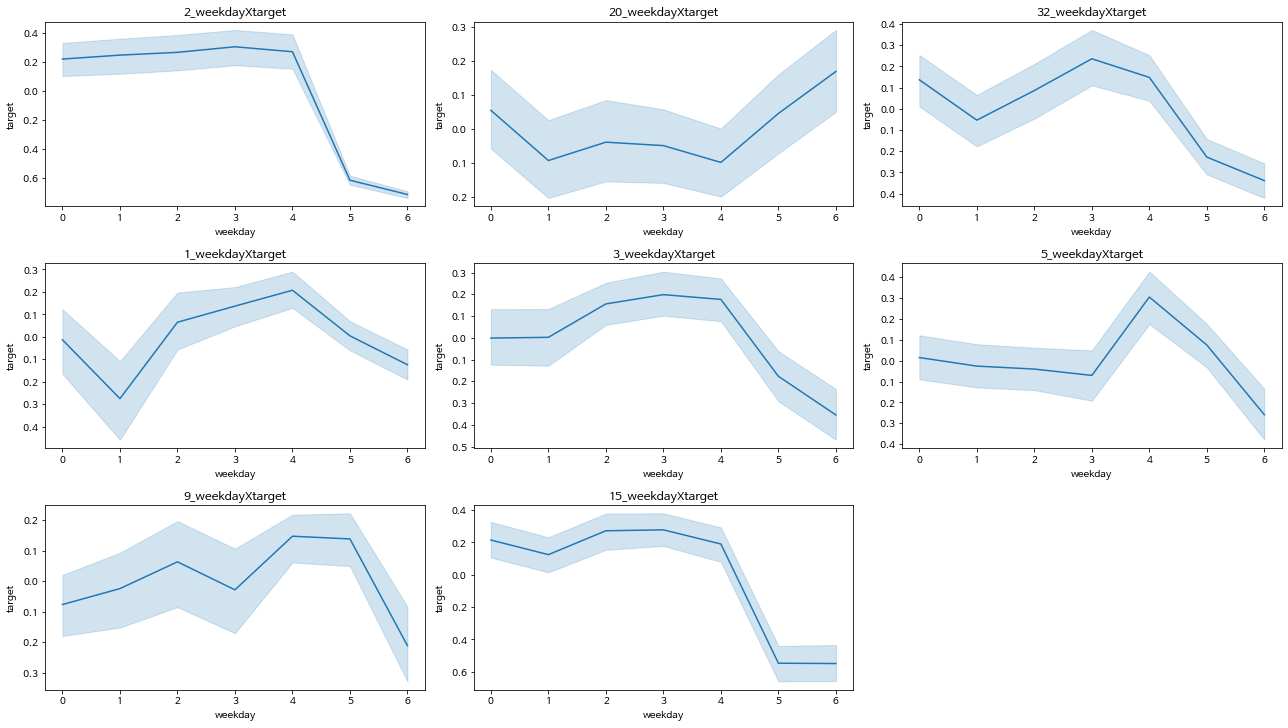

In [ ]:
fig = plt.figure(figsize=(18, 40))
for i, n in enumerate(weird_sample):
    plt.subplot(12, 3, i+1)
    plt.title("{}_weekdayXtarget".format(n))
    sns.lineplot(data=train.loc[train.num == n], x='weekday', y='target')
    plt.tight_layout()

요일별 패턴은 그래도 유사한 점이 있습니다.

- 32번과 유사하게, 모든 건물에서 주말(5~6)에는 사용량이 줄어듭니다.
- 32번과 유사하게, 많은 건물에서 목 ~ 금요일(3~4)에 가장 높은 사용량을 보이고 있습니다.
- 그러나 이 또한 유사한 규칙성을 보이지는 않고 있습니다.

### 2.2.3 정리

- 전략가형, 외교관형, 활동가형의 건물들은 기상 변수의 영향을 다소 받으며, 시간 변수의 영향도 비슷한 패턴을 보이고 있습니다.
- 그러나 연예인형의 변수는 기상 변수의 영향도 적으면서, 시간 변수의 패턴도 상이하게 나타나고 있습니다.
- 연예인형의 건물들을 같은 클러스터로 묶는 것은 다소 무리가 있을 것으로 판단되기도 합니다.
- 외교관형의 32, 39번 건물과 활동가형의 34번 건물은 군집의 다른 건물들과 다소 다른 패턴을 보이고 있습니다.

-----

## MBTI 궁합표
<img width="802" alt="H-01_3조" src="https://user-images.githubusercontent.com/96759124/157767645-323fee44-c5f4-433c-b7d7-48c1fc8a717d.png">


# 아이펠 대구캠퍼스 수강생들의 MBTI

In [ ]:
# 대구캠 MBTI 설문조사 데이터 info 출력: 총 24명 참여 완료!
data_orig.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 10 columns):
 #   Column                                                                         Non-Null Count  Dtype 
---  ------                                                                         --------------  ----- 
 0   타임스탬프                                                                          24 non-null     object
 1   1. MBTI 를 적어주세요.                                                               24 non-null     object
 2   2. MBTI 를 싫어하시나요?                                                              24 non-null     object
 3   3. 선호하는 상대방 MBTI는?                                                             24 non-null     object
 4   4. 더운 날이라도 건물 밖에 나가는 것을 선호하시나요?                                                24 non-null     object
 5   5. 선호하는 여름 온도를 체크해주세요. (여름철 평균 기온: 38)                                         24 non-null     int64 
 6   6. 비 오는 날 건물 밖에 있는 것이 좋은가요?         

In [ ]:
# 대구캠 MBTI 설문조사 데이터 내용 확인
data_orig

,타임스탬프,1. MBTI 를 적어주세요.,2. MBTI 를 싫어하시나요?,3. 선호하는 상대방 MBTI는?,4. 더운 날이라도 건물 밖에 나가는 것을 선호하시나요?,5. 선호하는 여름 온도를 체크해주세요. (여름철 평균 기온: 38),6. 비 오는 날 건물 밖에 있는 것이 좋은가요?,7. 견딜만 한 습도는? (여름철 평균 습도: 70),"8. 한 여름에 선호하는 건물 특징이 있다면 적어주세요. (예를 들면, 사람이 많은 건물(시끄러운 카페) vs 한적한 건물(조용한 카페))",9. 설문 결과 익명을 원하시나요?
0,2022/03/09 11:15:05 오후 GMT+9,ISFJ,NO,상관 없음,NO,36,NO,65,사람이 적고 한적하고 조용한 카페,NO
1,2022/03/09 11:15:31 오후 GMT+9,ENFP,NO,I (내향형),NO,30,YES,80,"에어컨이 빵빵한 건물, wifi가 빵빵한 건물, 환기가 잘되는 건물",NO
2,2022/03/09 11:15:41 오후 GMT+9,entp,YES,상관 없음,YES,34,YES,75,NaN,NO
3,2022/03/09 11:16:01 오후 GMT+9,isfp,NO,상관 없음,NO,30,NO,65,조용하지만 시원하고 예쁜 카페,NO
4,2022/03/09 11:17:02 오후 GMT+9,ISTP,NO,상관 없음,NO,30,NO,65,무조건 시원한곳,NO
5,2022/03/09 11:17:04 오후 GMT+9,ENFP,NO,E (외향형),NO,30,NO,65,한적한 건물(조용한 카페),NO
6,2022/03/09 11:19:27 오후 GMT+9,INFP,NO,상관 없음,NO,30,NO,65,한적,YES
7,2022/03/09 11:21:18 오후 GMT+9,INTJ,YES,상관 없음,NO,34,NO,65,한적한 건물(조용한 카페),YES
8,2022/03/09 11:22:02 오후 GMT+9,INTJ,NO,I (내향형),YES,32,NO,80,후자,NO
9,2022/03/09 11:23:51 오후 GMT+9,infp,NO,I (내향형),NO,30,NO,65,조용한 내집,YES


In [ ]:
# mbti 컬럼 데이터 모두 대문자로 통일
data_orig['1. MBTI 를 적어주세요.'] = data_orig['1. MBTI 를 적어주세요.'].str.upper()

In [ ]:
# 원본 구글폼 MBTI 설문 결과 시각화 함수(pie)
def draw_donut(data, col, width=500, height=500, hole=.3):
  values = data[col].value_counts()
  labels = data[col].unique().tolist()
  
  fig = px.pie(values=values, names=labels, width=width, height=height, hole=hole)
  fig.update_layout(
      title_text=col,
  )
  fig.show(renderer="colab")

In [ ]:
# 원본 구글폼 MBTI 설문 결과 시각화
for col in data_orig:
  if col != '타임스탬프' and \
      col != '8. 한 여름에 선호하는 건물 특징이 있다면 적어주세요. (예를 들면, 사람이 많은 건물(시끄러운 카페) vs 한적한 건물(조용한 카페))':
    draw_donut(data_orig, col)

- 원본 구글폼 MBTI 설문 결과 시각화

|-|image|image|
|:---:|:---:|:---:|
|1|![newplot (10)](https://user-images.githubusercontent.com/96759124/157776030-97c4f32b-34a8-4dcb-b23c-7faaa98fca02.png)|![newplot (11)](https://user-images.githubusercontent.com/96759124/157776041-1d513e6b-d9dd-45a9-8527-02467bd76ecb.png)|
|2|![newplot (12)](https://user-images.githubusercontent.com/96759124/157777828-fa7521a4-ebd2-4938-a0f2-fb6cddbe0576.png)|![newplot (13)](https://user-images.githubusercontent.com/96759124/157777837-258570ee-2aa6-42bb-8d77-284c7665eb82.png)|
|3|![newplot (14)](https://user-images.githubusercontent.com/96759124/157777840-1f7e5fdc-f472-46be-b394-d6db2cf7435b.png)|![newplot (15)](https://user-images.githubusercontent.com/96759124/157777847-9c2a40ef-64c6-4176-bca3-7b2cd689256b.png)|
|4|![newplot (16)](https://user-images.githubusercontent.com/96759124/157777849-bbc73dde-3387-42dd-b956-cec61ee1164c.png)|![newplot (17)](https://user-images.githubusercontent.com/96759124/157777855-57274f87-e289-407f-bc11-3148f937217c.png)|

아이펠 대구캠퍼스 사람들에게 MBTI 관련 설문조사를 해봤습니다. 총 24명이 참여한 결과는 다음과 같습니다.

- MBTI 많은 순서: ISFJ, ENFP, ENTP, ISFP, ISTP, INFP, INTJ, ...
- MBTI 를 싫어하지 않는 비율 대략 79.2%
- 선호하는 상대방 MBTI 는 상관 없다 54.2%
- 더운 날 건물 밖에 나가는 것을 선호하지 않는다 83.3%
- 선호하는 여름 온도 30도 79.2%
- 비 오는 날 건물 밖에 있는 것은 별로다 79.2%
- 견딜만 한 습도는 65퍼 83.3%
- 한 여름 선호하는 건물 특징으로 조용한 곳 75%

In [ ]:
# 컬럼명 한글 -> 영어 변환
cols = ["date_time", "mbti", "hate", "like", "hot_day", "temp", "rain_day", "humid", "building_feature", "anonym"]

In [ ]:
# 데이터 로드
data_path = os.path.join(data_dir, '[H-01] User_MBTI.csv')
data = pd.read_csv(data_path, names=cols, header=0)
print('data dim : {}'.format(data.shape))

data dim : (24, 10)


In [ ]:
# MBTI 설문 결과 데이터 백업
data_backup = data.copy()

In [ ]:
# date_time 열 삭제
data = data.drop(columns=['date_time'], axis=1)

In [ ]:
# MBTI 결측치 확인
data['mbti'].isnull().sum()

2

- 한국 MBTI 성향 비율 통계, 가장 많은 유형은? (최신 2021년) [참고](https://blog.naver.com/PostView.naver?blogId=salesworkskorea&logNo=222432628626&categoryNo=9&parentCategoryNo=0)
![image](https://user-images.githubusercontent.com/96759124/157769386-08b43d68-244d-42aa-902b-a5f439973169.png)

In [ ]:
# 한국 MBTI 성향 비율 통계에 따르면 INFP 가 가장 많은 유형이라서 mbti 결측값 INFP 으로 채움
data['mbti'] = data['mbti'].fillna('INFP')

In [ ]:
from sklearn.preprocessing import LabelEncoder

# 범주형 컬럼 원핫인코딩
str_col_list = ['like']

le = LabelEncoder()
for col in str_col_list:
  data[col] = le.fit_transform(data[col])

In [ ]:
# 대구캠 MBTI 설문 결과 시각화 함수(bar)
def draw_bar(data, col, count):
  colors = ['rgb(49,130,189)',    # blue
              'rgb(204,204,204)',   # light grey
              'rgb(50, 171, 96)',   # green
              'rgb(222,45,38)',     # red
              'rgb(142, 124, 195)', # purple
              'rgb(100,100,100)',   # darker grey
              'rgb(255,255,61)',    # yellow
              'rgb(255,169,58)'     # orange
             ]
  marker=dict(color='#0343df')
  fig = go.Figure(
    data=[go.Bar(x=data[col].index, y=data[col].value_counts(), marker=dict(color=colors[4]))],
    layout_title_text=col,
  )
  fig.show(renderer="colab")

In [ ]:
# 대구캠 MBTI 설문 결과 시각화
count = 0
for i, col in enumerate(data):
  draw_bar(data, col, count)
  count += 1

- 대구캠 MBTI 설문 결과 시각화

|-|image|image|
|:---:|:---:|:---:|
|1|![newplot (18)](https://user-images.githubusercontent.com/96759124/157777857-a6ff4842-5274-424e-b339-d953bc3d5554.png)|![newplot (19)](https://user-images.githubusercontent.com/96759124/157777865-fdec8d05-6a2d-423d-be1a-6931ad2d1e93.png)|
|2|![newplot (20)](https://user-images.githubusercontent.com/96759124/157777871-ef3c8f44-bc60-45a6-87fb-3fde449dd798.png)|![newplot (21)](https://user-images.githubusercontent.com/96759124/157777875-2864f9d0-af67-4acb-a10f-ac2dd83bcd49.png)|
|3|![newplot (22)](https://user-images.githubusercontent.com/96759124/157777878-979f4a18-18e2-41a1-8bd5-2cffa453763a.png)|![newplot (23)](https://user-images.githubusercontent.com/96759124/157777886-ca0eeb60-6935-46f4-b3ce-6cbf14ea5a13.png)|
|4|![newplot (24)](https://user-images.githubusercontent.com/96759124/157777902-7d24d667-2858-491b-8f95-b479778a1165.png)|![newplot (25)](https://user-images.githubusercontent.com/96759124/157777909-1de54376-a4bc-4411-b179-35de975eb1d5.png)|
|5|![newplot (26)](https://user-images.githubusercontent.com/96759124/157777920-0bc50875-cfe6-455e-a4d9-7f341415b161.png)|




MBTI 결측치를 INFP 로 채웠더니 대구캠에서 가장 많은 MBTI 유형은 INFP 로 나왔습니다.


- MBTI 궁합 확인 코딩 [참고](https://esevan.tistory.com/14)

In [ ]:
# MBTI 궁합 매트릭스
MBTI_GOODNESS = np.matrix([
    [4, 4, 4, 5, 4, 5, 4, 4, 1, 1, 1, 1, 1, 1, 1, 1],
    [4, 4, 5, 4, 5, 4, 4, 4, 1, 1, 1, 1, 1, 1, 1, 1],
    [4, 5, 4, 4, 4, 4, 4, 5, 1, 1, 1, 1, 1, 1, 1, 1],
    [5, 4, 4, 4, 4, 4, 4, 4, 5, 1, 1, 1, 1, 1, 1, 1],
    [4, 5, 4, 4, 4, 4, 4, 5, 3, 3, 3, 3, 2, 2, 2, 2],
    [5, 4, 4, 4, 4, 4, 5, 4, 3, 3, 3, 3, 3, 3, 3, 3],
    [4, 4, 4, 4, 4, 5, 4, 4, 3, 3, 3, 3, 2, 2, 2, 5],
    [4, 4, 5, 4, 5, 4, 4, 4, 3, 3, 3, 3, 2, 2, 2, 2],
    [1, 1, 1, 5, 3, 3, 3, 3, 2, 2, 2, 2, 3, 5, 3, 5],
    [1, 1, 1, 1, 3, 3, 3, 3, 2, 2, 2, 2, 5, 3, 5, 3],
    [1, 1, 1, 1, 3, 3, 3, 3, 2, 2, 2, 2, 3, 5, 3, 5],
    [1, 1, 1, 1, 3, 3, 3, 3, 2, 2, 2, 2, 5, 3, 5, 3],
    [1, 1, 1, 1, 2, 3, 2, 2, 3, 5, 3, 5, 4, 4, 4, 4],
    [1, 1, 1, 1, 2, 3, 2, 2, 5, 3, 5, 3, 4, 4, 4, 4],
    [1, 1, 1, 1, 2, 3, 2, 2, 3, 5, 3, 5, 4, 4, 4, 4],
    [1, 1, 1, 1, 2, 3, 5, 2, 5, 3, 5, 3, 4, 4, 4, 4]
])

# MBTI 숫자 매핑
MBTI_MAP = dict(
    INFP=0,
    ENFP=1,
    INFJ=2,
    ENFJ=3,
    INTJ=4,
    ENTJ=5,
    INTP=6,
    ENTP=7,
    ISFP=8,
    ESFP=9,
    ISTP=10,
    ESTP=11,
    ISFJ=12,
    ESFJ=13,
    ISTJ=14,
    ESTJ=15
)

# MBTI 궁합 설명
GOODNESS_DICT = {
    5: '우리 인연 영원히 뽀에버! 천생연분!',
    4: '아주 좋은 관계가 될 수 있음!',
    3: '안 맞는 것, 맞는 것 딱 반반',
    2: '뭐.. 최악은 면했지만 그닥..',
    1: '진짜 궁합 최악! 지구 멸망의 길',
}

In [ ]:
# MBTI 숫자 매핑
data['mbti'] = data['mbti'].map(MBTI_MAP)

In [ ]:
import numpy as np
import pandas as pd
import collections
import scipy.cluster.hierarchy as hcl

from scipy.spatial.distance import squareform

# MBTI 궁합 확인 클래스
class MbtiAnalysis:
    def __init__(self, member_mbti_dict, buidling_km_mbti_dict):
        self._mbti_dict = member_mbti_dict.copy()
        self._buidling_km_mbti_dict = buidling_km_mbti_dict.copy()
        self._member_num = [k for k in self._mbti_dict.keys()]
        self._building_km_num = [k for k in self._buidling_km_mbti_dict.keys()]
        self._member_vibe = collections.defaultdict(dict)
        self._member_score = collections.defaultdict(int)
        self._mbti_inverted = collections.defaultdict(list)
        self._linkage = None
        self._user_n_building = []

        self._init_mbti_inverted()
        self._init_vibe()

    def _init_mbti_inverted(self):
        for key, value in self._mbti_dict.items():
            self._mbti_inverted[value].append(key)

        self._mbti_inverted = [(k, v) for k, v in self._mbti_inverted.items()]
        self._mbti_inverted.sort(key=lambda tup: len(tup[1]), reverse=True)


    def _init_vibe(self):
        for i in range(0, len(self._member_num)):
            for j in range(0, len(self._building_km_num)):
                first_member, first_member_mbti = self._get_member_mbti(i)
                second_member, second_member_mbti = self._get_building_km_mbti(j)
                goodness = MBTI_GOODNESS.item((MBTI_MAP[first_member_mbti], MBTI_MAP[second_member_mbti]))
                self._member_score[first_member] += goodness
                self._member_vibe[first_member][second_member] = goodness

    def _get_building_km_mbti(self, idx):
      return (self._building_km_num[idx], self._buidling_km_mbti_dict[self._building_km_num[idx]])


    def _get_member_mbti(self, idx):
        return (self._member_num[idx], self._mbti_dict[self._member_num[idx]])

    @property
    def member_score(self):
        return sorted([(member, score) for member, score in self._member_score.items()], key=lambda tup: tup[1], reverse=True)

    @property
    def mbti_inverted(self):
        return self._mbti_inverted

    @property
    def mbti_distance_matrix(self):
        data = {}
        idx = 0
        for member, vibe in self._member_vibe.items():
            data[idx] = [5 - goodness for _, goodness in vibe.items()]
            data[idx][idx] = 0
            idx += 1

        member_vibe = pd.DataFrame(data)
        return member_vibe

    @property
    def mbti_dict(self):
        return self._member_vibe

    @property
    def member(self):
        return self._member_num

    def get_cluster_info(self, max_distance=2):
        if self._linkage is None:
            self._linkage = hcl.linkage(squareform(self.mbti_distance_matrix))

        cluster = hcl.fcluster(self._linkage, max_distance, criterion='distance')

        cluster_info = collections.defaultdict(list)

        for idx, cluster_no in enumerate(cluster):
            cluster_info[cluster_no].append(self._member_num[idx])

        return cluster_info

    # MBTI 궁합 결과 출력
    def print_vibe(self):
        for member, vibe in self._member_vibe.items():
            for another_member, goodness in vibe.items():
                print(f'{member}({self._mbti_dict[member]})님 + {another_member}({self._buidling_km_mbti_dict[another_member]}) 건물 = {GOODNESS_DICT[goodness]}')
                self._user_n_building.append({'user':member,
                                            'user_mbti': self._mbti_dict[member],
                                            'goodness':goodness,
                                            'building':another_member,
                                            'building_mbti':self._buidling_km_mbti_dict[another_member]})
            print('------------------------------------------------')

    def print_score(self):
        for member, score in self.member_score:
            print(f'{member}: {score}')

    def print_mbti_inverted(self):
        for mbti_type, members in self.mbti_inverted:
            print(f'{mbti_type}: {members}')

    def print_cluster_info(self, max_distance=2):
        cluster_info = self.get_cluster_info(max_distance)
        for cluster_no, members in cluster_info.items():
            print(f'+ {cluster_no} 조')
            print('  + ', end='')
            for member in members:
                print(f'{member} ', end='')
            print('')

In [ ]:
# 건물 MBTI
buidling_km_mbti_dict = {
    'km_0': 'INTJ',  # 전략가
    'km_1': 'ENFP',  # 활동가
    'km_2': 'ESFJ',  # 외교관
    'km_3': 'ESFP',  # 연예인
}

In [ ]:
# 팀 4명 MBTI
member_mbti_dict = {
    '박혜령':'INTP',
    '이봄':'ISFJ',
    '권민호':'ISFP',
    '허준호':'ENTP'
}

In [ ]:
# 팀원 4명의 MBTI 와 건물 MBTI 궁합 결과 출력
mbti_analysis = MbtiAnalysis(member_mbti_dict, buidling_km_mbti_dict)
mbti_analysis.print_vibe()

박혜령(INTP)님 + km_0(INTJ) 건물 = 아주 좋은 관계가 될 수 있음!
박혜령(INTP)님 + km_1(ENFP) 건물 = 아주 좋은 관계가 될 수 있음!
박혜령(INTP)님 + km_2(ESFJ) 건물 = 뭐.. 최악은 면했지만 그닥..
박혜령(INTP)님 + km_3(ESFP) 건물 = 안 맞는 것, 맞는 것 딱 반반
------------------------------------------------
이봄(ISFJ)님 + km_0(INTJ) 건물 = 뭐.. 최악은 면했지만 그닥..
이봄(ISFJ)님 + km_1(ENFP) 건물 = 진짜 궁합 최악! 지구 멸망의 길
이봄(ISFJ)님 + km_2(ESFJ) 건물 = 아주 좋은 관계가 될 수 있음!
이봄(ISFJ)님 + km_3(ESFP) 건물 = 우리 인연 영원히 뽀에버! 천생연분!
------------------------------------------------
권민호(ISFP)님 + km_0(INTJ) 건물 = 안 맞는 것, 맞는 것 딱 반반
권민호(ISFP)님 + km_1(ENFP) 건물 = 진짜 궁합 최악! 지구 멸망의 길
권민호(ISFP)님 + km_2(ESFJ) 건물 = 우리 인연 영원히 뽀에버! 천생연분!
권민호(ISFP)님 + km_3(ESFP) 건물 = 뭐.. 최악은 면했지만 그닥..
------------------------------------------------
허준호(ENTP)님 + km_0(INTJ) 건물 = 우리 인연 영원히 뽀에버! 천생연분!
허준호(ENTP)님 + km_1(ENFP) 건물 = 아주 좋은 관계가 될 수 있음!
허준호(ENTP)님 + km_2(ESFJ) 건물 = 뭐.. 최악은 면했지만 그닥..
허준호(ENTP)님 + km_3(ESFP) 건물 = 안 맞는 것, 맞는 것 딱 반반
------------------------------------------------


# 대구캠 결과 정리

- 우리 조원들의 mbti 궁합에 따른 건물 추천을 보자면,


박혜령(INTP)님에게 추천하는 건물로는 km_0(INTJ) 건물 또는 km_1(ENFP) 건물이 있고, 추천하지 않는 건물로는 km_2(ESFJ) 건물이 있었다.

------------------------------------------------

이봄(ISFJ)님에게 추천하는 건물로는 km_3(ESFP) 건물과 km_2(ESFJ)이 있고, 추천하지 않는 건물로는 km_0(INTJ) 건물과 km_1(ENFP) 건물이 있었다.

------------------------------------------------

권민호(ISFP)님에게 추천하는 건물로는 km_2(ESFJ) 건물이 있고, 추천하지 않는 건물로는 km_1(ENFP) 건물이 있었다.

------------------------------------------------

허준호(ENTP)님에게 추천하는 건물로는 km_0(INTJ) 건물이 있고, 추천하지 않는 건물로는 km_2(ESFJ) 건물이 있었다.

- 대구캠 MBTI 와 건물 MBTI 궁합 결과 정리

대구 캠퍼스 수강생들의 mbti 설문조사를 통해 사용자의 mbti와 궁합이 제일 좋은 건물을 추천하는 시스템을 제작하고자 했다.


현재 대구 캠퍼스의 위치에 관한 이슈가 있었는데 이 프로젝트를 통해 추천할만한 건물을 유추해 볼 수 있지 않을까 예상한다.

In [ ]:
# 대구캠 MBTI 와 건물 MBTI 궁합 결과 출력
mbti_analysis = MbtiAnalysis({'daegu_cam':'ISFJ'}, buidling_km_mbti_dict)
mbti_analysis.print_vibe()

daegu_cam(ISFJ)님 + km_0(INTJ) 건물 = 뭐.. 최악은 면했지만 그닥..
daegu_cam(ISFJ)님 + km_1(ENFP) 건물 = 진짜 궁합 최악! 지구 멸망의 길
daegu_cam(ISFJ)님 + km_2(ESFJ) 건물 = 아주 좋은 관계가 될 수 있음!
daegu_cam(ISFJ)님 + km_3(ESFP) 건물 = 우리 인연 영원히 뽀에버! 천생연분!
------------------------------------------------


대구 캠퍼스 수강생들의 mbti 결측 값을 제외했을 때, 가장 많은 비중을 차지하는 유형은 ISFJ로  대구 캠퍼스를 대표하여 건물 mbti와 궁합을 보았다.

그 결과, 대구캠퍼스(ISFJ)에게 추천하는 건물로는 km_3(ESFP) 건물이 있고, 추천하지 않는 건물로는 km_0(INTJ) 건물이 있었다.

In [ ]:
# 대구캠 MBTI 와 건물 MBTI 궁합 결과 출력
mbti_analysis = MbtiAnalysis({'daegu_cam':'INFP'}, buidling_km_mbti_dict)
mbti_analysis.print_vibe()

daegu_cam(INFP)님 + km_0(INTJ) 건물 = 아주 좋은 관계가 될 수 있음!
daegu_cam(INFP)님 + km_1(ENFP) 건물 = 아주 좋은 관계가 될 수 있음!
daegu_cam(INFP)님 + km_2(ESFJ) 건물 = 진짜 궁합 최악! 지구 멸망의 길
daegu_cam(INFP)님 + km_3(ESFP) 건물 = 진짜 궁합 최악! 지구 멸망의 길
------------------------------------------------


대구 캠퍼스 수강생들의 mbti 결측 값을 INFP 로 채운 후 살펴봤을 때, 가장 많은 비중을 차지하는 유형은 INFP로  대구 캠퍼스를 대표하여 건물 mbti와 궁합을 보았다.

그 결과, 대구캠퍼스(INFP)에게 추천하는 건물로는 km_0(INTJ) 건물과 km_1(ENFP) 건물이 있고, 추천하지 않는 건물로는 km_2(ESFJ) 건물과 km_3(ESFP) 건물이 있었다.

- 건물 MBTI 별 분류

In [ ]:
# 건물 mbti별 분류
print(f'km_0: {km_0}')
print(f'km_1: {km_1}')
print(f'km_2: {km_2}')
print(f'km_3: {km_3}')

km_0: [19, 20, 21, 34, 49, 50, 51]
km_1: [2, 6, 7, 8, 13, 14, 16, 17, 18, 22, 23, 24, 25, 26, 27, 31, 33, 35, 37, 38, 43, 44, 45, 46, 47, 48, 52, 53, 54, 55, 56, 57, 58]
km_2: [1, 3, 5, 9, 15]
km_3: [4, 10, 11, 12, 28, 29, 30, 32, 36, 39, 40, 41, 42, 59, 60]


# 결론

- 본 데이터셋은 60개 건물들의 2020년 6월 1일 부터 2020년 8월 24일까지의 데이터(전력사용량(kWh) 포함)와 건물 정보와 기후 정보를 활용한 전력사용량 예측 데이터이다.


- 직관적으로 본 데이터셋은 6월 ~ 8월에 관한 데이터로 하절기로 판단할 수 있었고, 건물 정보로 주어진 비전기냉방설비운영과 태양광보유 여부가 건물의 전력사용량을 낮춰준다고 예상하였으나, 데이터 분석 결과, 비전기냉방설비와 태양열 설치 여부는 예상외로 전력사용량에 영향을 주지 않는다는걸 확인했다.


- 처음에는 흔하다고 할 수 있는 전력사용량 줄이기, 태양열 에너지 사용, 피크타임 쇼트 예방 등의 가설을 생각했으나, 시각화하여 상관관계를 분석하니 실제로는 서로 영향을 주지 않는 경우를 확인했다.


- 또한, 기존 데이터의 기후 정보를 활용하여 불쾌지수와 체감온도라는 새로운 변수를 생성하여 건물과의 상관관계를 분석 했지만, 이 또한 크게 영향을 주지 않았다.


- 그러하여, 전력사용량과 시간의 상관관계를 분석하여 건물의 용도를 임의로 예측하여 군집별로 어떠한 특징을 가지고 있는지, 또 MBTI 궁합도표를 기반으로 어떤 건물이 적합한지 살펴보도록 하겠다.


- 실제로 수 많은 건물을 전부 유형별로 분석하기에는 너무 많은 자원과 비용이 들 것이다. 또한 MBTI의 16가지 유형 중, 대표적으로 용의주도한 전략가[분석형], 자유로운 영혼의 연예인[탐험가형], 사교적인 외교관[관리자형], 재기발랄한 활동가[외교형]와 함께 건물의 MBTI를 분석해보았다.


- 대구 캠퍼스 수강생들을 대상으로 사전조사를 진행하여 데이터를 만들고 대구캠 수강생들으 mbti를 건물의 mbti와의 궁합을 보고 적합한 건물을 추천해 보았다.


- 독특한 인사이트 도출에 성공한 것 같아서 만족스럽다! (뿌듯)

- 설문지 문답을 전부 활용하지 못하여서 아쉽고, 불쾌지수와 체감지수를 구하여 시각화하려고 했지만 못한 부분이 있었다. 시간이 부족해서 많이 아쉬웠던 주제의 프로젝트였다.

- 또한, 다른 외부 데이터를 추가하여 시각화를 진행하고자 계획했으나 공공데이터를 찾아서 가져오는 것부터가 힘든 과정임을 확인했다. 다음 번 헤커톤에서는 모델링까지 진행할 수 있도록 더욱 노력해야겠다.